# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

%pip install pycountry_convert
%pip install folium
%pip install seaborn
%pip install plotly



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Dữ liệu tổng quan:

In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [6]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [7]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


In [8]:
import beautifultable
import warnings
warnings.filterwarnings('ignore')

* Ngày đầu tiên và cuối cùng lưu trữ dữ liệu

In [9]:
table = beautifultable.BeautifulTable()

first_day_confirmed = confirmed_df.columns[4]
first_day_deaths = deaths_df.columns[4]
first_day_recoveries = recoveries_df.columns[4]

last_day_confirmed = confirmed_df.columns[-1]
last_day_deaths = deaths_df.columns[-1]
last_day_recoveries = recoveries_df.columns[-1]

table.column_headers = ["Covids","First Day", "Last Day"]
table.append_row(["Confirmed day",first_day_confirmed, last_day_confirmed])
table.append_row(["Deaths Day",first_day_deaths, last_day_deaths])
table.append_row(["Recoveries Day",first_day_recoveries, last_day_recoveries])
print(table)

+----------------+-----------+----------+
|     Covids     | First Day | Last Day |
+----------------+-----------+----------+
| Confirmed day  |  1/22/20  |  8/4/21  |
+----------------+-----------+----------+
|   Deaths Day   |  1/22/20  |  8/4/21  |
+----------------+-----------+----------+
| Recoveries Day |  1/22/20  |  8/4/21  |
+----------------+-----------+----------+


* Số quốc gia được ghi nhận

In [10]:
confirmed_df_country = confirmed_df.groupby('Country/Region').agg({'Country/Region': 'count'}).sum().values[0]
deaths_df_country = deaths_df.groupby('Country/Region').agg({'Country/Region': 'count'}).sum().values[0]
recoveries_df_country = recoveries_df.groupby('Country/Region').agg({'Country/Region': 'count'}).sum().values[0]

table = beautifultable.BeautifulTable()
table.column_headers = ["Covids","Number of countries"]
table.append_row(["Confirmed",confirmed_df_country])
table.append_row(["Deaths",deaths_df_country])
table.append_row(["Recoveries",recoveries_df_country])
print(table)

+------------+---------------------+
|   Covids   | Number of countries |
+------------+---------------------+
| Confirmed  |         289         |
+------------+---------------------+
|   Deaths   |         289         |
+------------+---------------------+
| Recoveries |         274         |
+------------+---------------------+


* Tính tổng cho 3 bộ dữ liệu

In [11]:
total_confirmed_day = pd.to_datetime(confirmed_df.columns[4:], errors="coerce").value_counts().sum()
total_deaths_day = pd.to_datetime(deaths_df.columns[4:], errors="coerce").value_counts().sum()
total_recoveries_day = pd.to_datetime(recoveries_df.columns[4:], errors="coerce").value_counts().sum()

table = beautifultable.BeautifulTable()
table.column_headers = ["Covids","Total days"]
table.append_row(["Confirmed",total_confirmed_day])
table.append_row(["Deaths",total_deaths_day])
table.append_row(["Recoveries",total_recoveries_day])
print(table)

+------------+------------+
|   Covids   | Total days |
+------------+------------+
| Confirmed  |    561     |
+------------+------------+
|   Deaths   |    561     |
+------------+------------+
| Recoveries |    561     |
+------------+------------+


* Quốc gia lưu trữ thông tin của từng thành phố và toàn quốc

In [12]:
country_df = {'Save Country Confirmed': confirmed_df.loc[confirmed_df['Province/State'].isnull(), "Country/Region"].value_counts().sum(), 
              'Unsave Country Confirmed': confirmed_df.loc[~confirmed_df['Province/State'].isnull(), "Country/Region"].value_counts().sum(),
              'Save Country Deaths': deaths_df.loc[deaths_df['Province/State'].isnull(), "Country/Region"].value_counts().sum(),
              'Unsave Country Deaths': deaths_df.loc[~deaths_df['Province/State'].isnull(), "Country/Region"].value_counts().sum(),
              'Save Country Recoveries': recoveries_df.loc[recoveries_df['Province/State'].isnull(), "Country/Region"].value_counts().sum(),
              'Unsave Country Recoveries': recoveries_df.loc[~recoveries_df['Province/State'].isnull(), "Country/Region"].value_counts().sum()}
table = beautifultable.BeautifulTable()
table.column_headers = ["Covids","Number of countries"]
table.append_row(["Save Country Confirmed",country_df['Save Country Confirmed']])
table.append_row(["Unsave Country Confirmed",country_df['Unsave Country Confirmed']])
table.append_row(["Save Country Deaths",country_df['Save Country Deaths']])
table.append_row(["Unsave Country Deaths",country_df['Unsave Country Deaths']])
table.append_row(["Save Country Recoveries",country_df['Save Country Recoveries']])
table.append_row(["Unsave Country Recoveries",country_df['Unsave Country Recoveries']])
print(table)

+---------------------------+---------------------+
|          Covids           | Number of countries |
+---------------------------+---------------------+
|  Save Country Confirmed   |         198         |
+---------------------------+---------------------+
| Unsave Country Confirmed  |         91          |
+---------------------------+---------------------+
|    Save Country Deaths    |         198         |
+---------------------------+---------------------+
|   Unsave Country Deaths   |         91          |
+---------------------------+---------------------+
|  Save Country Recoveries  |         199         |
+---------------------------+---------------------+
| Unsave Country Recoveries |         75          |
+---------------------------+---------------------+


* Quốc gia và ngày có số ca Covid nhiều nhất

In [13]:
max_confirmed_df = confirmed_df.copy().drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1)

# lấy giá trị max của mỗi dòng và index
max_confirmed_df['Max'] = max_confirmed_df.max(axis=1)
max_confirmed_df['Max Date'] = max_confirmed_df.idxmax(axis=1)
max_confirmed_df = max_confirmed_df[['Max', 'Max Date']].sort_values(by='Max', ascending=False).rename(columns={'Max': 'Max Confirmed'})
max_confirmed_df['Country'] = confirmed_df['Country/Region']
max_confirmed_df = max_confirmed_df[['Country', 'Max Confirmed', 'Max Date']].sort_values(by='Max Confirmed', ascending=False)
max_confirmed = max_confirmed_df['Max Confirmed'].max()
result = max_confirmed_df.loc[max_confirmed_df['Max Confirmed'] == max_confirmed]

table = beautifultable.BeautifulTable()
table.column_headers = ["Covids","Country","Max Confirmed","Max Date"]
for index, row in result.iterrows():
    table.append_row(["Confirmed",row['Country'],row['Max Confirmed'],row['Max Date']])
print(table)

+-----------+---------+---------------+----------+
|  Covids   | Country | Max Confirmed | Max Date |
+-----------+---------+---------------+----------+
| Confirmed |   US    |   35460776    |  8/4/21  |
+-----------+---------+---------------+----------+


* Quốc gia có tổng người chết cao nhất

In [14]:
count_deaths_df = deaths_df.copy().drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1)
count_deaths_df['Max'] = count_deaths_df.sum(axis=1)
count_deaths_df = count_deaths_df[['Max']].rename(columns={'Max': 'Max Deaths'})
count_deaths_df['Country'] = deaths_df['Country/Region']
count_deaths_df = count_deaths_df[['Country', 'Max Deaths']].sort_values(by='Max Deaths', ascending=False)
max_deaths = count_deaths_df['Max Deaths'].max()
result = count_deaths_df.loc[count_deaths_df['Max Deaths'] == max_deaths]

table = beautifultable.BeautifulTable()
table.column_headers = ["Covids","Country","Max Deaths"]
for index, row in result.iterrows():
    table.append_row(["Deaths",row['Country'],row['Max Deaths']])
print(table)

+--------+---------+------------+
| Covids | Country | Max Deaths |
+--------+---------+------------+
| Deaths |   US    | 163218805  |
+--------+---------+------------+


* Tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.


In [15]:
VN_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'Vietnam'].reset_index(drop=True)
VN_deaths_df = deaths_df[deaths_df['Country/Region'] == 'Vietnam'].reset_index(drop=True)
VN_recoveries_df = recoveries_df[recoveries_df['Country/Region'] == 'Vietnam'].reset_index(drop=True)

total = pd.DataFrame(columns=['Confirmed', 'Deaths', 'Recoveries'])
total['Confirmed'] = VN_confirmed_df[VN_confirmed_df.columns[4:]].sum(axis=1)
total['Deaths'] = VN_deaths_df[VN_deaths_df.columns[4:]].sum(axis=1)
total['Recoveries'] = VN_recoveries_df[VN_recoveries_df.columns[4:]].sum(axis=1)
total['Active'] = total['Confirmed'] - total['Deaths'] - total['Recoveries']

total

,Confirmed,Deaths,Recoveries,Active
0,3540076,29256,1261448,2249372


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [16]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

total_cases = confirmed.sum()
total_deaths = deaths.sum()
total_recovered = recoveries.sum()
total_active = confirmed.sum() - deaths.sum() - recoveries.sum()

mortality_rate = total_deaths / total_cases * 100
recovery_rate = total_recovered / total_cases * 100


In [17]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

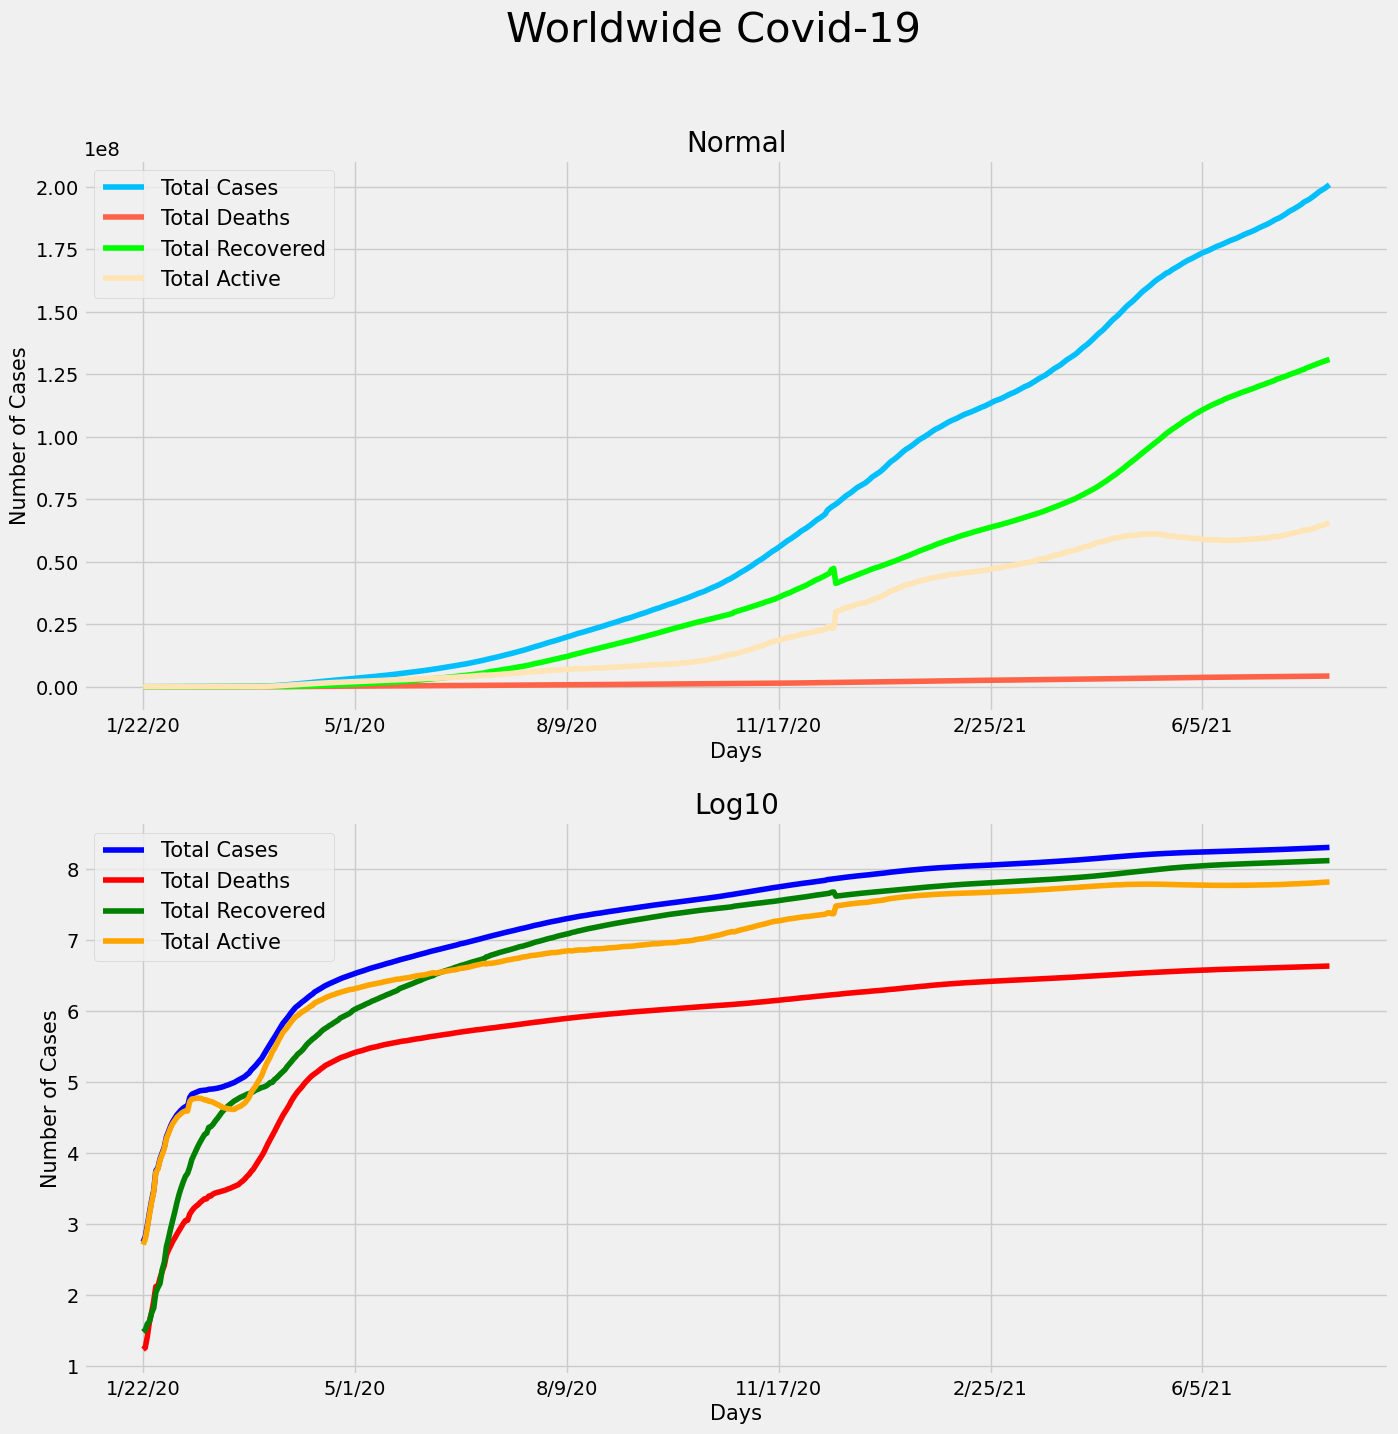

In [18]:
#Nhập mã lập trình của bạn tại đây:
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
total_cases.plot(kind='line', color='deepskyblue', label='Total Cases')
total_deaths.plot(kind='line', color='tomato', label='Total Deaths')
total_recovered.plot(kind='line', color='lime', label='Total Recovered')
total_active.plot(kind='line', color='moccasin', label='Total Active')
plt.title('Normal', size=20)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(loc='best', fontsize=15)

plt.subplot(2, 1, 2)
np.log10(total_cases).plot(kind='line', color='blue', label='Total Cases')
np.log10(total_deaths).plot(kind='line', color='red', label='Total Deaths')
np.log10(total_recovered).plot(kind='line', color='green', label='Total Recovered')
np.log10(total_active).plot(kind='line', color='orange', label='Total Active')
plt.title('Log10', size=20)
plt.xlabel('Days', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(loc='best', fontsize=15)

plt.suptitle('Worldwide Covid-19', size=30)
plt.show()

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

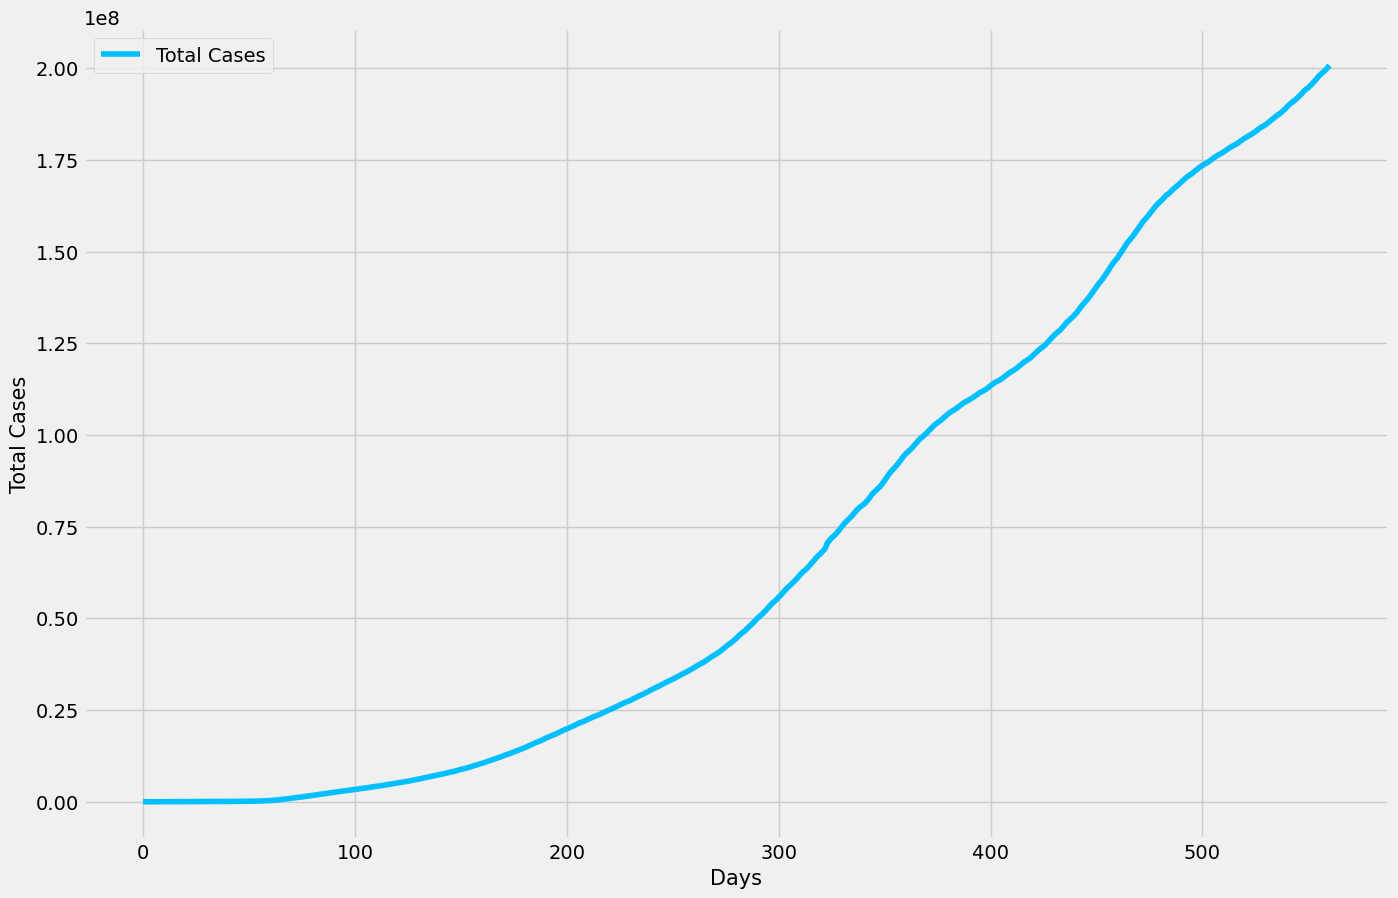

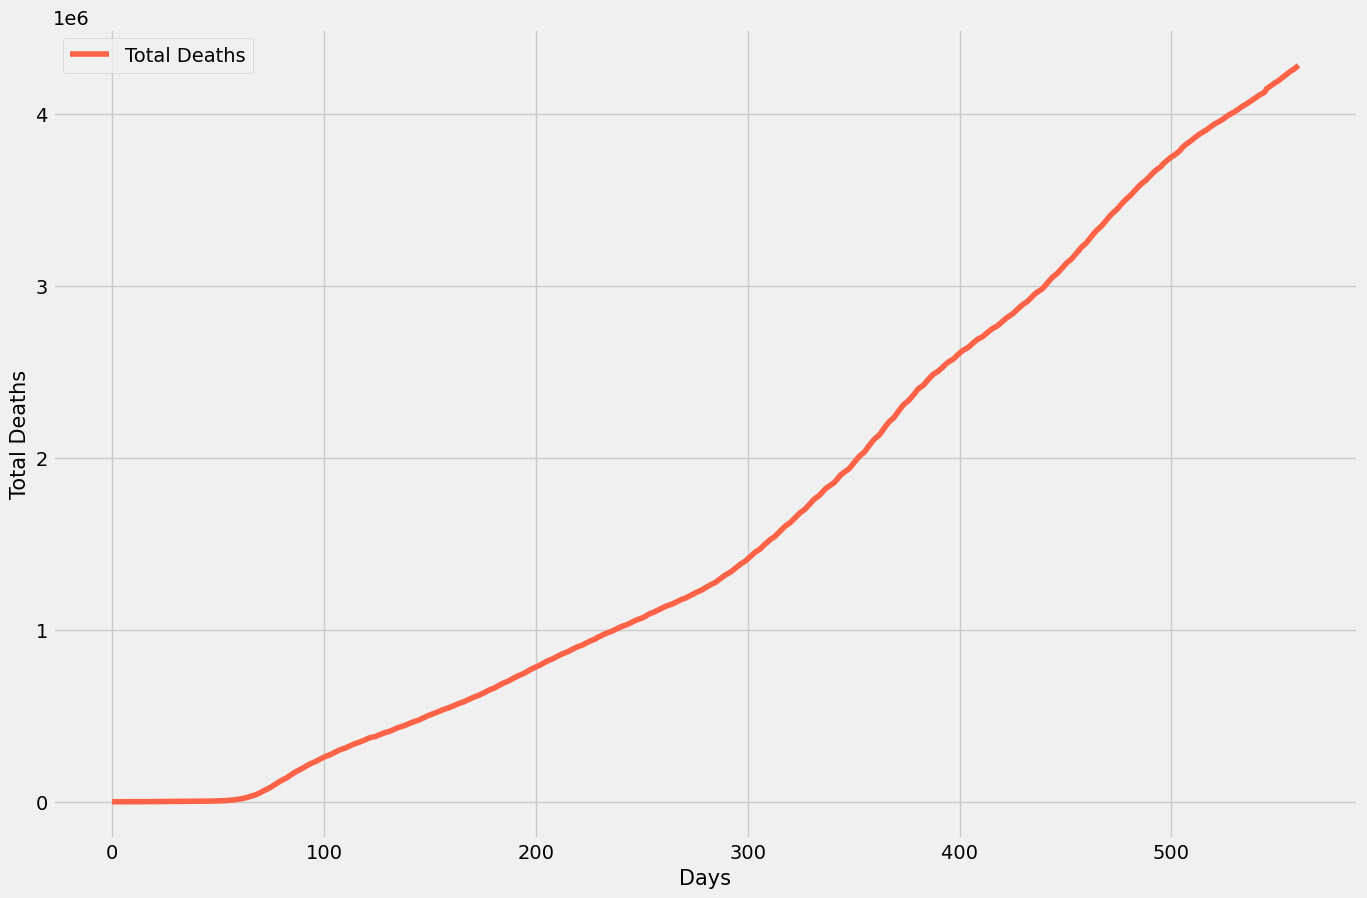

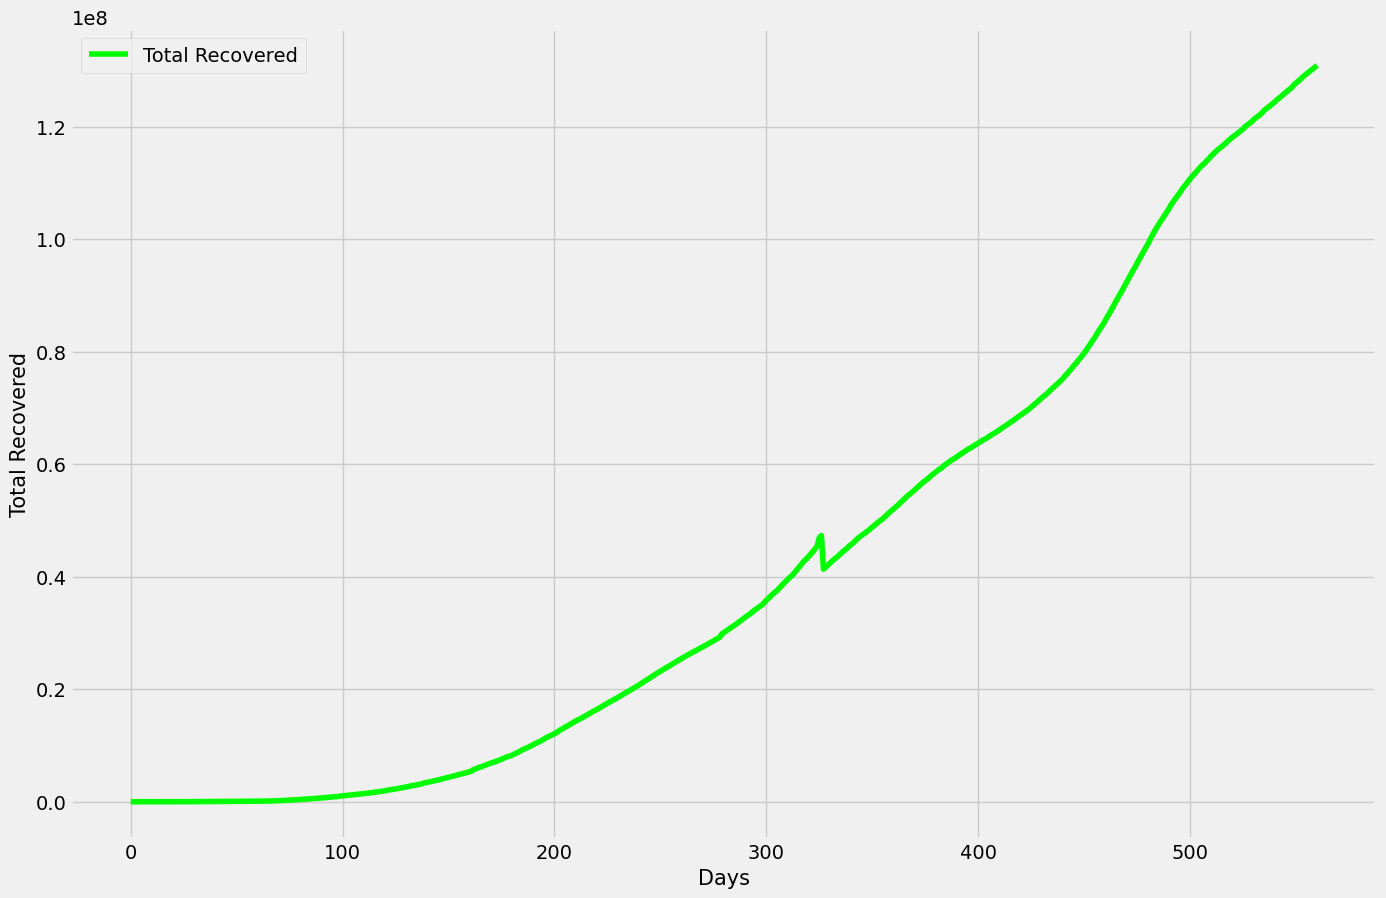

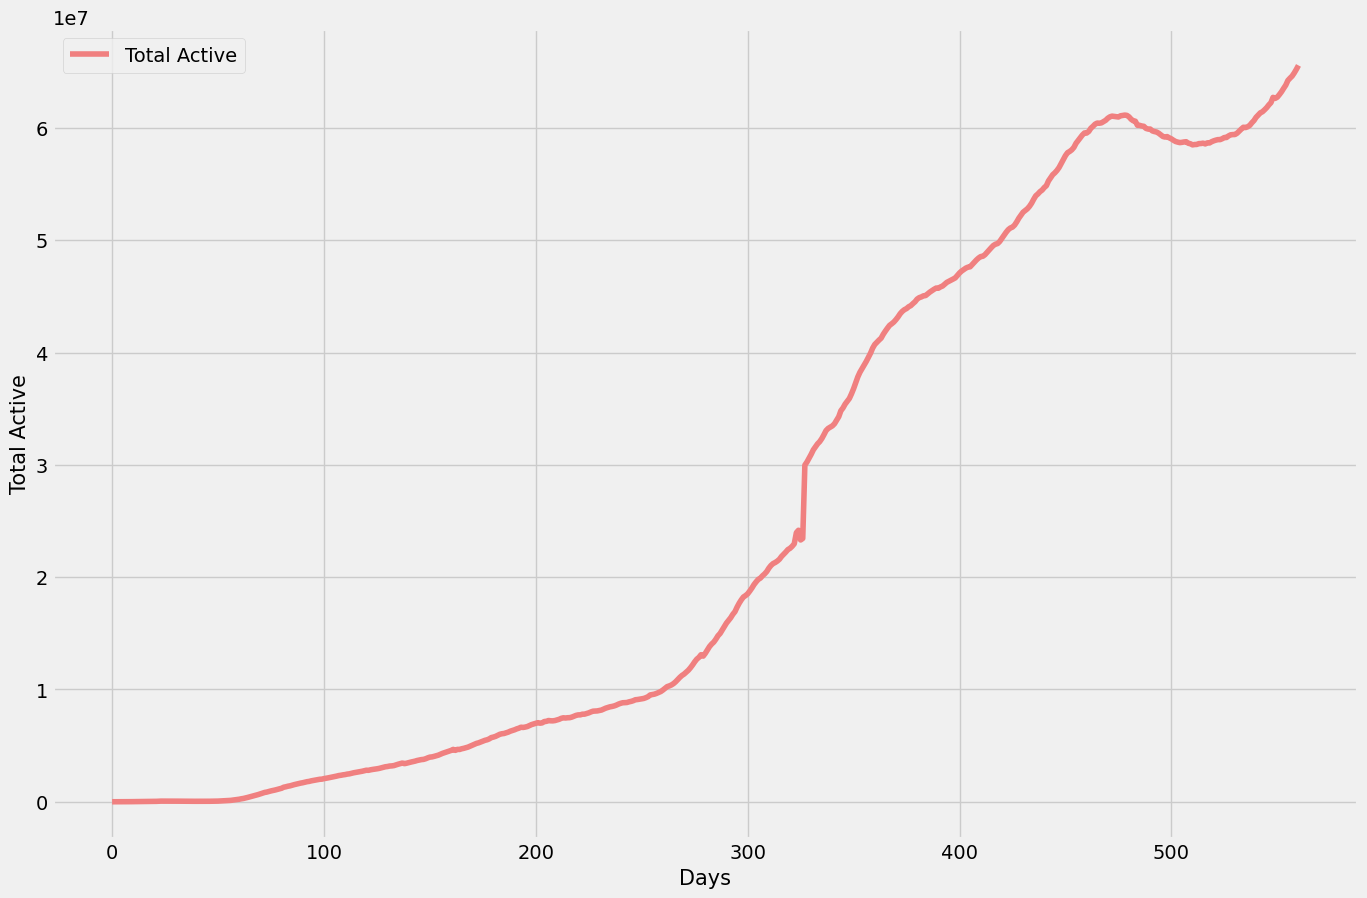

In [19]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=adjusted_dates, y=total_cases, color='deepskyblue', label='Total Cases')
plt.xlabel('Days', size=15)
plt.ylabel('Total Cases', size=15)
plt.show()

plt.figure(figsize=(15, 10))
sns.lineplot(x=adjusted_dates, y=total_deaths, color='tomato', label='Total Deaths')
plt.xlabel('Days', size=15)
plt.ylabel('Total Deaths', size=15)
plt.show()

plt.figure(figsize=(15, 10))
sns.lineplot(x=adjusted_dates, y=total_recovered, color='lime', label='Total Recovered')
plt.xlabel('Days', size=15)
plt.ylabel('Total Recovered', size=15)
plt.show()

plt.figure(figsize=(15, 10))
sns.lineplot(x=adjusted_dates, y=total_active, color='lightcoral', label='Total Active')
plt.xlabel('Days', size=15)
plt.ylabel('Total Active', size=15)
plt.show()


## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [20]:
def increment_by_day(window=2):
  if len(window) > 1:
    return window.iloc[-1] - window.iloc[0]
  return np.nan

total_df = pd.DataFrame({'Total Cases': total_cases, 'Total Deaths': total_deaths, 'Total Recovered': total_recovered, 'Total Active': total_active, 'Adjusted_dates': adjusted_dates}).set_index('Adjusted_dates')

increment_df = total_df.rolling(window=2).apply(increment_by_day)
increment_df.rename(columns={'Total Cases': 'Daily Increment Cases', 'Total Deaths': 'Daily Increment Deaths', 'Total Recovered': 'Daily Increment Recovered', 'Total Active': 'Daily Increment Active'}, inplace=True)
increment_df.dropna(inplace=True)

increment_df.head(10)

,Daily Increment Cases,Daily Increment Deaths,Daily Increment Recovered,Daily Increment Active
Adjusted_dates,,,,
1,100.0,1.0,2.0,97.0
2,287.0,8.0,7.0,272.0
3,493.0,16.0,3.0,474.0
4,683.0,14.0,14.0,655.0
5,809.0,26.0,9.0,774.0
6,2651.0,49.0,43.0,2559.0
7,589.0,2.0,19.0,568.0
8,2068.0,39.0,18.0,2011.0
9,1690.0,42.0,80.0,1568.0


## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

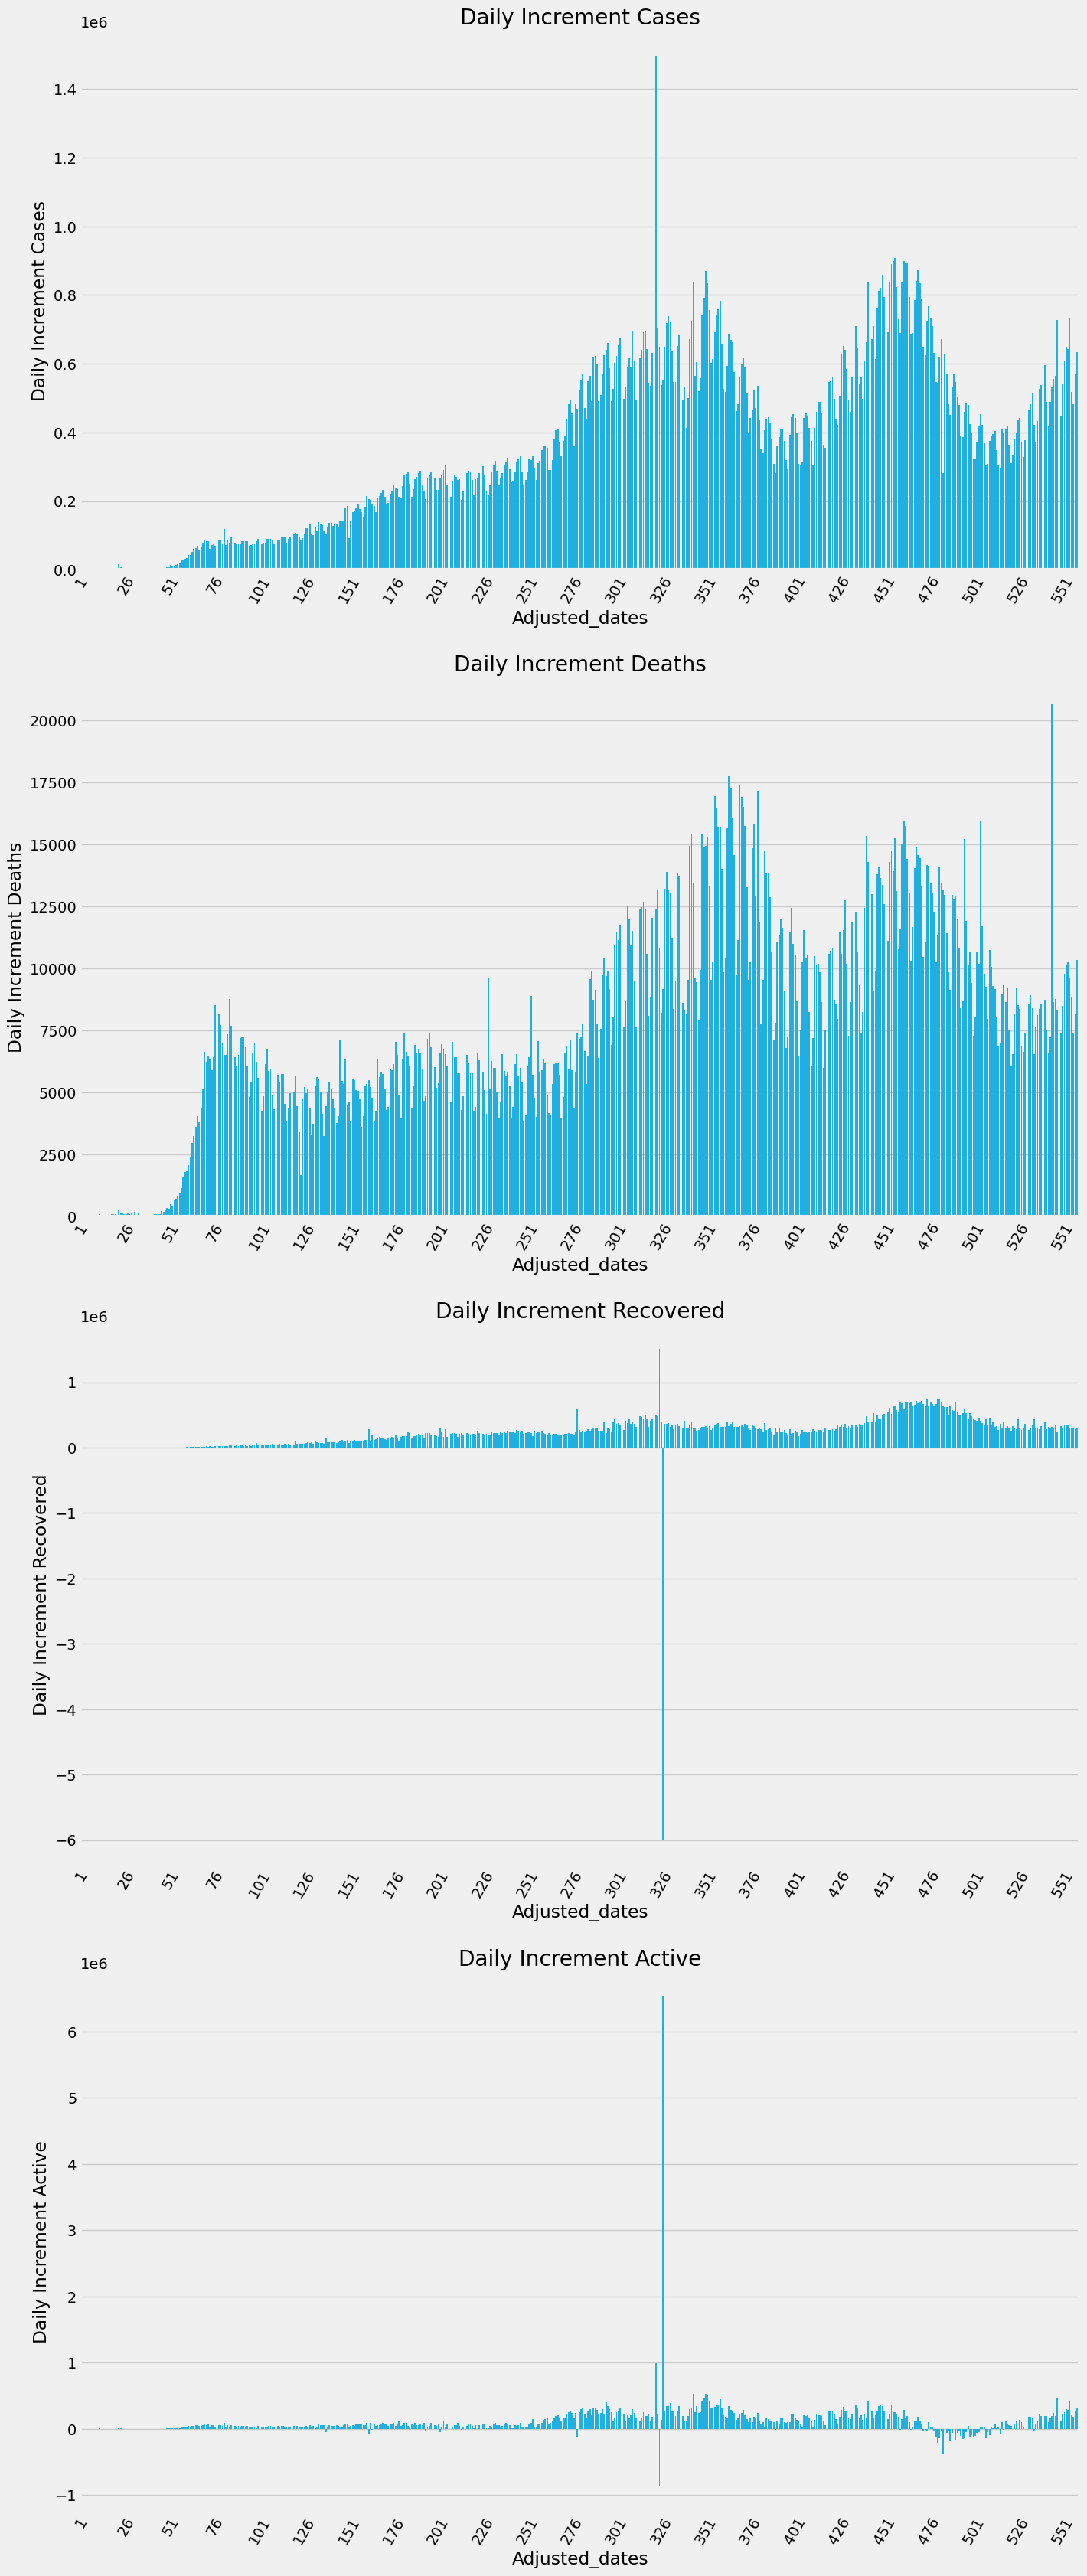

In [21]:
plt.figure(figsize=(15, 40))

for idx, col in enumerate(increment_df.columns):
  plt.subplot(4,1,idx+1)
  plt.title(col)
  sns.barplot(x=increment_df.index, y=increment_df[col], data=increment_df, color='deepskyblue')
  plt.xticks(rotation=60, ticks=range(0, len(increment_df.index), 25))
plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [22]:
mortality_rate_df = pd.DataFrame({'Mortality Rate': mortality_rate, 'Adjusted_dates': adjusted_dates}).set_index('Adjusted_dates')
recovery_rate_df = pd.DataFrame({'Recovery Rate': recovery_rate, 'Adjusted_dates': adjusted_dates}).set_index('Adjusted_dates')

# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

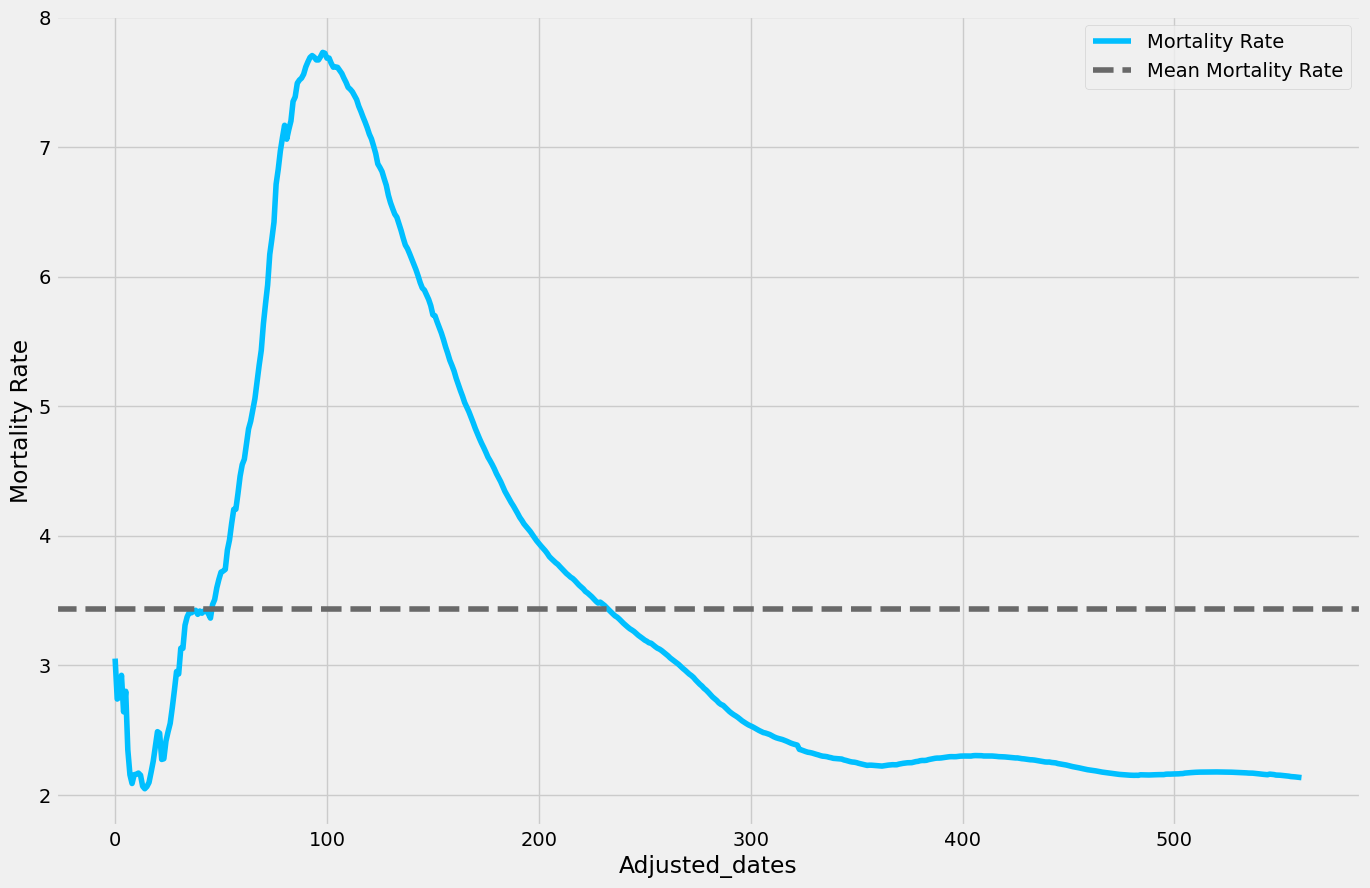

In [23]:
#Nhập mã lập trình của bạn tại đây:
plt.figure(figsize=(15, 10))
sns.lineplot(x=mortality_rate_df.index, y=mortality_rate_df['Mortality Rate'], color='deepskyblue', label='Mortality Rate')
plt.axhline(mortality_rate_df['Mortality Rate'].mean(), color='dimgray', label='Mean Mortality Rate', linestyle='--')
plt.legend(loc='best')
plt.show()

**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

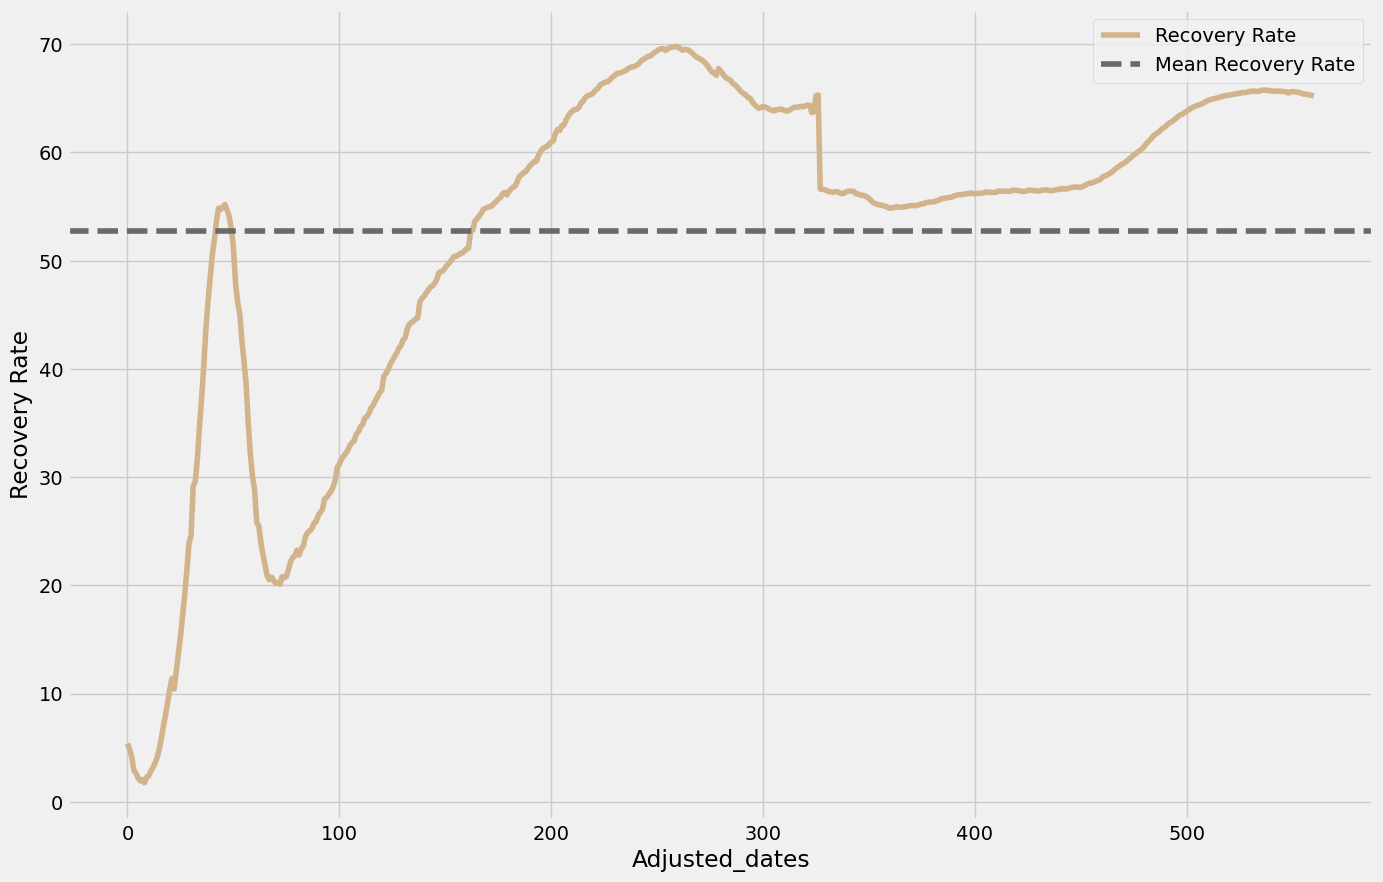

In [24]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=recovery_rate_df.index, y=recovery_rate_df['Recovery Rate'], color='tan', label='Recovery Rate')
plt.axhline(recovery_rate_df['Recovery Rate'].mean(), color='dimgray', label='Mean Recovery Rate', linestyle='--')
plt.legend(loc='best')
plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [25]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [26]:
confirmed_df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])
confirmed_df.head()

deaths_df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries1[:]])
deaths_df.head()

recoveries_df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries2[:]])
recoveries_df.head()

,Province/State,Country/Region,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [27]:
country_df = confirmed_df.groupby('Country/Region').sum().drop(['Lat','Long'], axis=1).reset_index()
country_df = country_df[['Country/Region', 'Continent', '8/4/21']].rename(columns={'8/4/21': 'Confirmed'})

country_df = country_df.merge(deaths_df.groupby('Country/Region').sum().drop(['Lat','Long'], axis=1).reset_index()[['Country/Region', '8/4/21']].rename(columns={'8/4/21': 'Deaths'}), on=['Country/Region'], how='left').merge(recoveries_df.groupby('Country/Region').sum().drop(['Lat','Long'], axis=1).reset_index()[['Country/Region', '8/4/21']].rename(columns={'8/4/21': 'Recoveries'}), on=['Country/Region'], how='left')

country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']
country_df['Moratality Rate'] = round(country_df['Deaths'] / country_df['Confirmed'] * 100, 2)

country_df.set_index('Country/Region', inplace=True)

country_df.head()

,Continent,Confirmed,Deaths,Recoveries,Active,Moratality Rate
Country/Region,,,,,,
Afghanistan,Asia,148933,6836,82586,59511,4.59
Albania,Europe,133310,2457,130314,539,1.84
Algeria,Africa,176724,4404,118409,53911,2.49
Andorra,Europe,14797,128,14380,289,0.87
Angola,Africa,43158,1026,39582,2550,2.38


# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [28]:
continental_df = confirmed_df.groupby('Continent').sum().drop(['Lat','Long'], axis=1).reset_index()[['Continent', '8/4/21']].rename(columns={'8/4/21': 'Confirmed'})
continental_df = continental_df.merge(deaths_df.groupby('Continent').sum().drop(['Lat','Long'], axis=1).reset_index()[['Continent', '8/4/21']].rename(columns={'8/4/21': 'Deaths'}), on=['Continent'], how='left').merge(recoveries_df.groupby('Continent').sum().drop(['Lat','Long'], axis=1).reset_index()[['Continent', '8/4/21']].rename(columns={'8/4/21': 'Recoveries'}), on=['Continent'], how='left')
continental_df['Active'] = continental_df['Confirmed'] - continental_df['Deaths'] - continental_df['Recoveries']
continental_df['Moratality Rate'] = round(continental_df['Deaths'] / continental_df['Confirmed'] * 100, 2)

continental_df.set_index('Continent', inplace=True)
continental_df

,Confirmed,Deaths,Recoveries,Active,Moratality Rate
Continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902952,57853343,3780431,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167140,27947075,23334330,2.23
North America,42351963,924518,5776939,35650506,2.18
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [29]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

In [30]:
gb_total_df_continent = confirmed_df.groupby('Continent').sum().drop(columns=["Country/Region", "Province/State", "Lat", "Long"], axis=1).reset_index().rename(columns={'Continent': 'continent'})

gb_death_df_continent = deaths_df.groupby('Continent').sum().drop(columns=["Country/Region", "Province/State", "Lat", "Long"], axis=1).reset_index().rename(columns={'Continent': 'continent'})

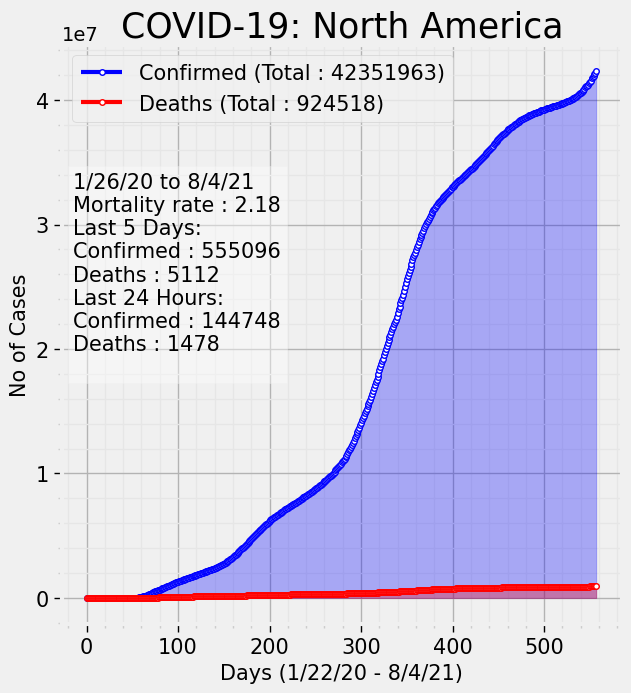

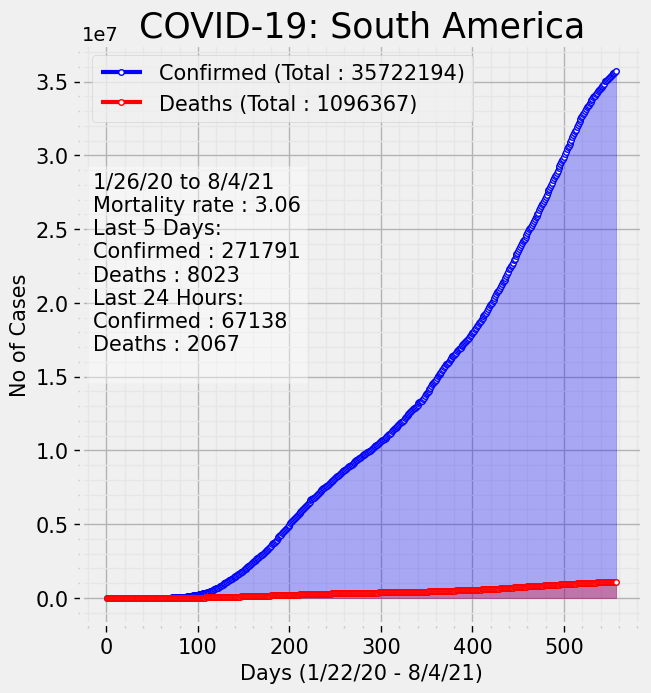

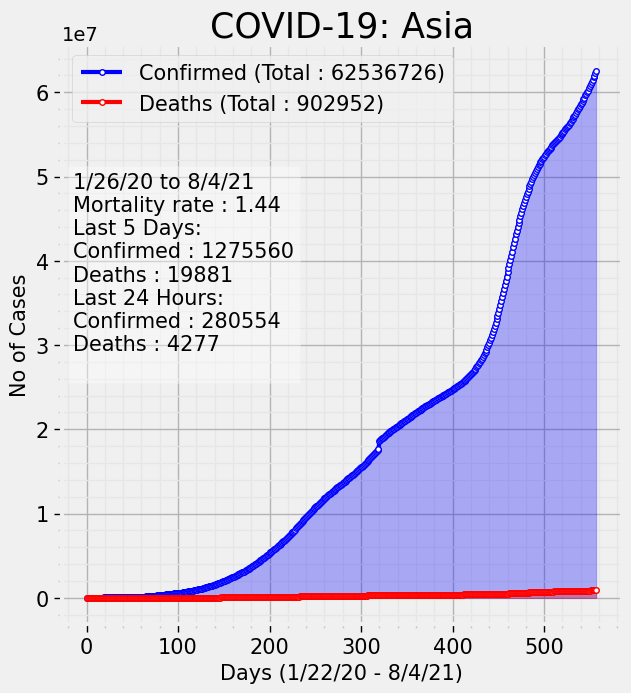

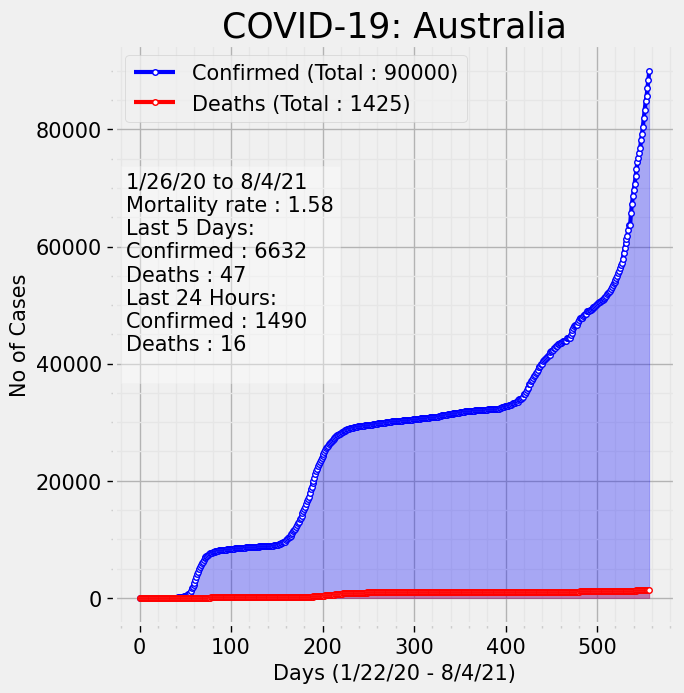

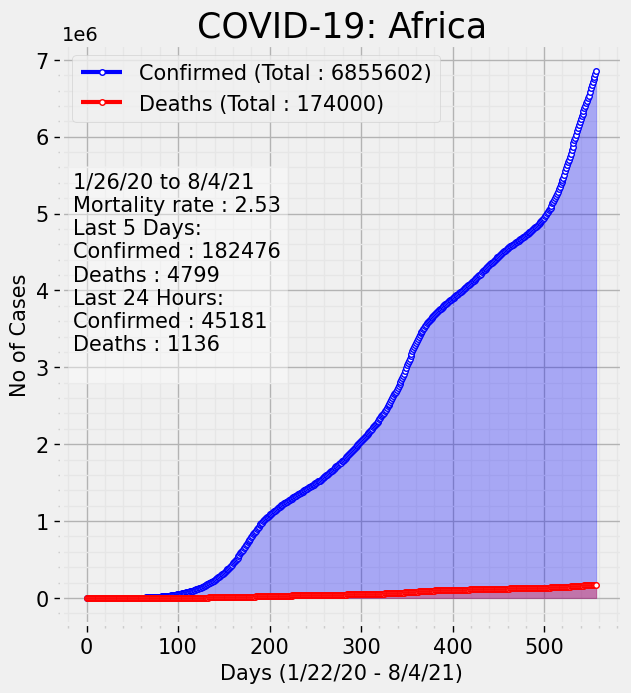

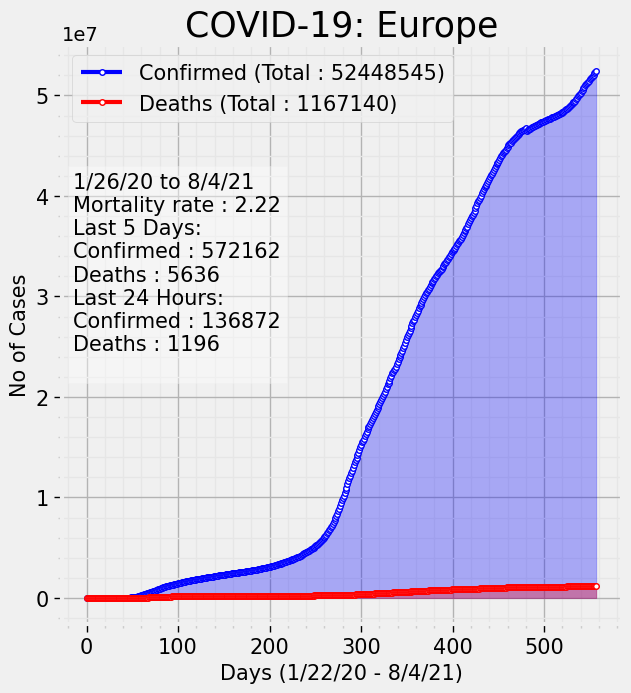

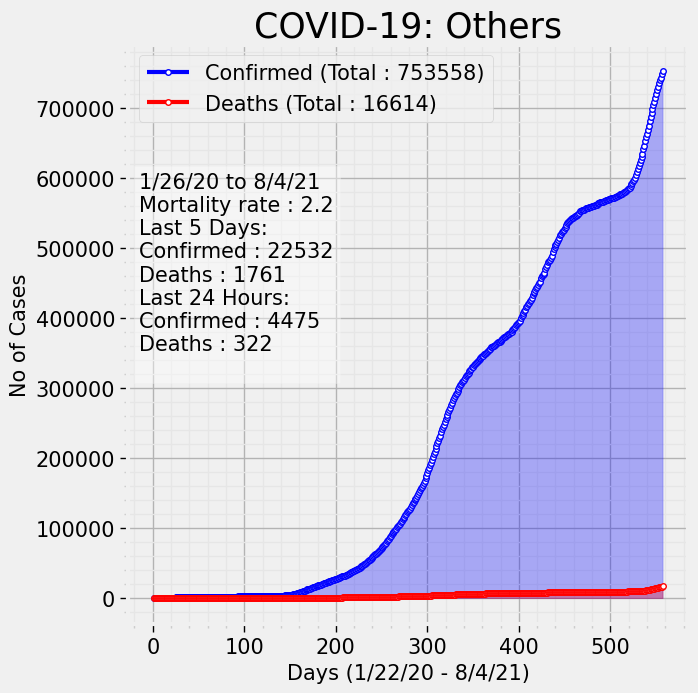

In [31]:
for cont in continents.values():
    visualize_covid_cases(gb_total_df_continent, gb_death_df_continent, continent=cont)


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [32]:
def plot_params(
    ax,
    axis_label=None,
    plt_title=None,
    label_size=15,
    axis_fsize=15,
    title_fsize=30,
    scale="linear",
):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which="both", width=1, labelsize=label_size)
    ax.tick_params(which="major", length=6)
    # NOTE: sua plotparam chu yeu de lay diem
    ax.tick_params(which="minor", length=3, color="1")

    # Grid
    plt.grid(lw=1, ls="-", c="0.7", which="major")
    plt.grid(lw=1, ls="-", c="0.9", which="minor")

    # Plot Title
    plt.title(plt_title, {"fontsize": title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0], fontsize=axis_fsize)
    yl = plt.ylabel(axis_label[1], fontsize=axis_fsize)


def visualize_covid_cases(
    confirmed,
    deaths,
    recoveries,
    continent=None,
    country=None,
    state=None,
    period=None,
    figure=None,
    scale="linear",
):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10, 10))
        # Sub plot
        ax = f.add_subplot(111)
    else:
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1], figure[2], figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent", continent]
    elif country != None:
        params = ["country", country]
    else:
        params = ["All", "All"]
    color = ["blue", "red", "green"]
    marker_style = dict(
        linewidth=3,
        linestyle="-",
        marker="o",
        markersize=4,
        markerfacecolor="#ffffff",
    )
    for i, stat in enumerate(stats):
        if params[1] == "All":
            cases = np.sum(np.asarray(stat.iloc[:, 1:]), axis=0)[x:]
        else:
            cases = np.sum(
                np.asarray(stat[stat[params[0]] == params[1]].iloc[:, 1:]),
                # np.asarray(stat.loc[params[1]].iloc[:, 1:]),
                axis=0,
            )[x:]
        date = np.arange(1, cases.shape[0] + 1)[x:]
        plt.plot(
            date,
            cases,
            label=label[i] + " (Total : " + str(cases[-1]) + ")",
            color=color[i],
            **marker_style
        )
        plt.fill_between(date, cases, color=color[i], alpha=0.3)
    if params[1] == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:, 1:]), axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:, 1:]), axis=0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:, 1:]), axis=0)[x:]
    else:
        Total_confirmed = np.sum(
            np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]
        Total_deaths = np.sum(
            np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]
        Total_recoveries = np.sum(
            np.asarray(stats[1][stats[2][params[0]] == params[1]].iloc[:, 1:]),
            axis=0,
        )[x:]

    text = stats[0].columns[1] + " to " + stats[0].columns[-1] + "\n"
    text += (
        "\nMortality rate : "
        + str(int(Total_deaths[-1] / (Total_confirmed[-1]) * 10000) / 100)
        + "\n"
    )
    text += "\nLast 7 Days:\n"
    text += (
        "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8]) + "\n"
    )
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8]) + "\n"
    text += (
        "Recoveries : "
        + str(Total_recoveries[-1] - Total_recoveries[-8])
        + "\n"
    )
    text += "\nLast 24 Hours:\n"
    text += (
        "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2]) + "\n"
    )
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2]) + "\n"
    text += (
        "Recoveries : "
        + str(Total_recoveries[-1] - Total_recoveries[-2])
        + "\n"
    )

    plt.text(
        0.02,
        0.78,
        text,
        fontsize=15,
        horizontalalignment="left",
        verticalalignment="top",
        transform=ax.transAxes,
        bbox=dict(facecolor="white", alpha=0.4),
    )

    # Plot Axes Labels
    axis_label = [
        "Days ("
        + confirmed_df.columns[-8]
        + " - "
        + confirmed_df.columns[-1]
        + ")",
        "No of Cases",
    ]

    # Plot Parameters
    plot_params(ax, axis_label, scale=scale)

    # Plot Title
    if params[1] == "All":
        plt.title("COVID-19 Cases World", {"fontsize": 25})
    else:
        plt.title("COVID-19: " + params[1], {"fontsize": 25})

    # Legend Location
    l = plt.legend(loc="best", fontsize=15)

    if figure == None:
        plt.show()

In [33]:
gb_recoveries_df_continent = recoveries_df.groupby('Continent').sum().drop(columns=["Country/Region", "Province/State", "Lat", "Long"], axis=1).reset_index().rename(columns={'Continent': 'continent'})

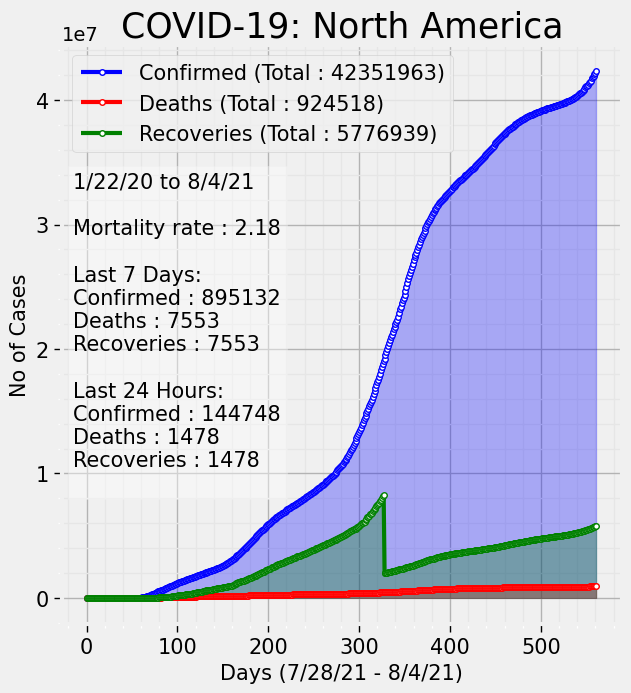

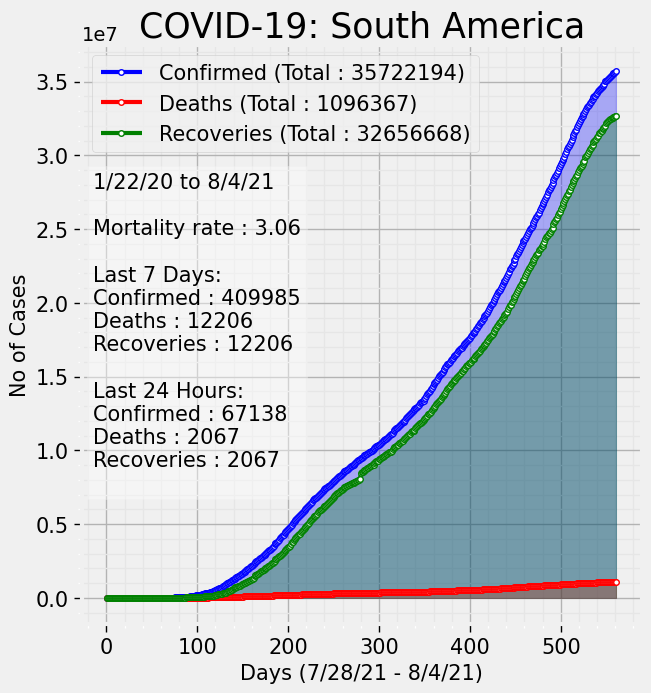

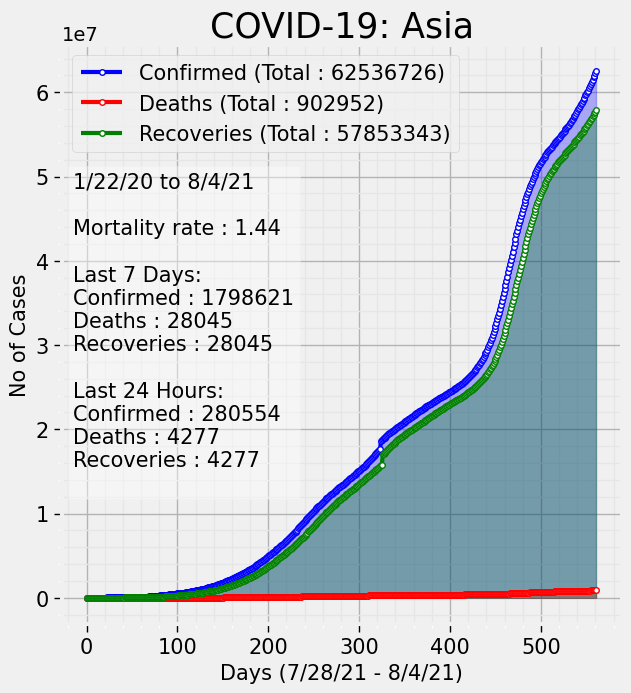

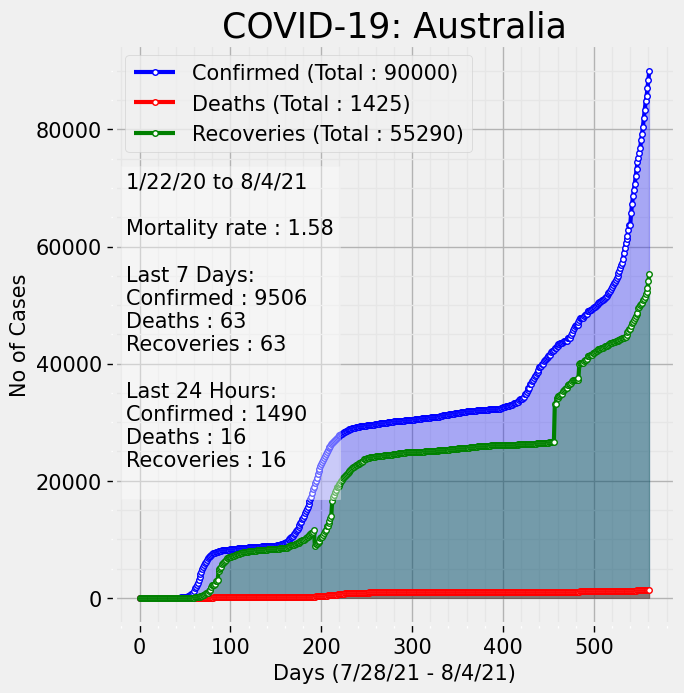

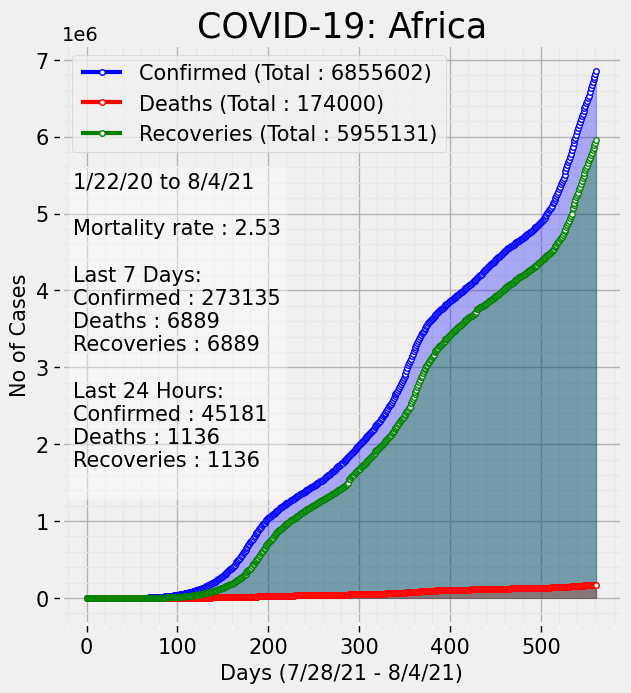

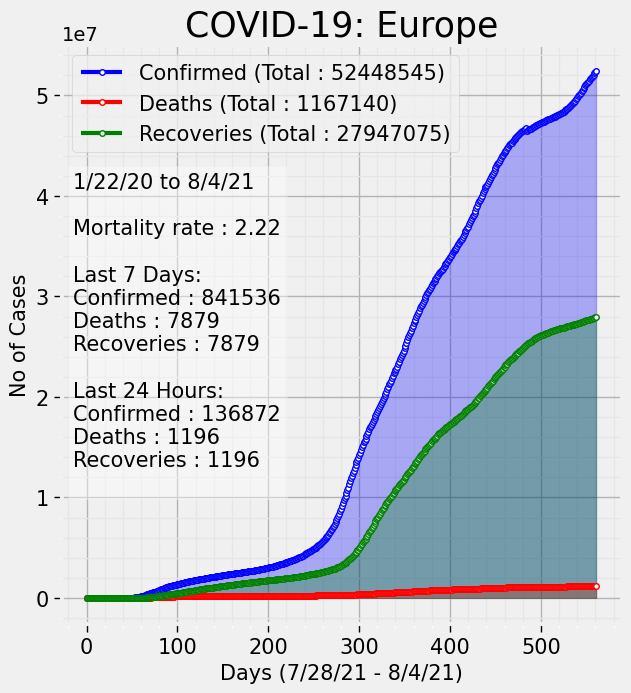

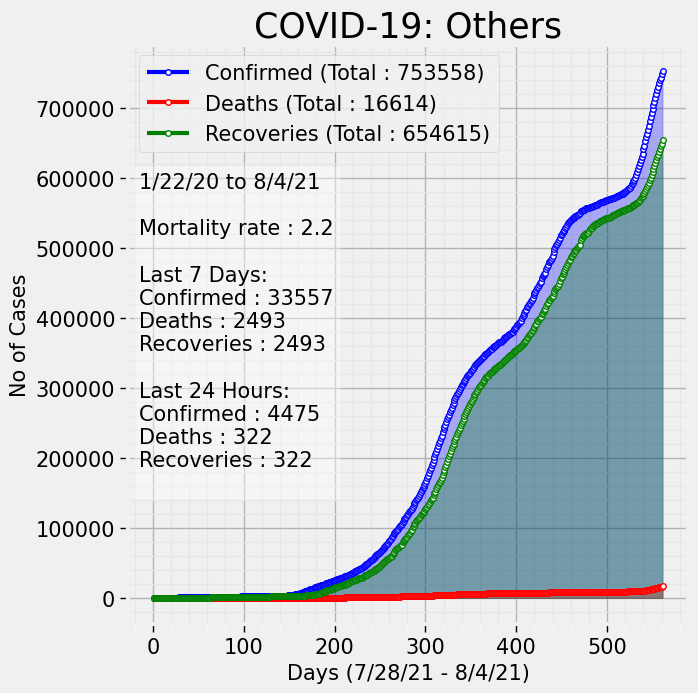

In [34]:
for cont in continents.values():
    visualize_covid_cases(confirmed=gb_total_df_continent, deaths=gb_death_df_continent, recoveries=gb_recoveries_df_continent,continent=cont)

# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

<Axes: >

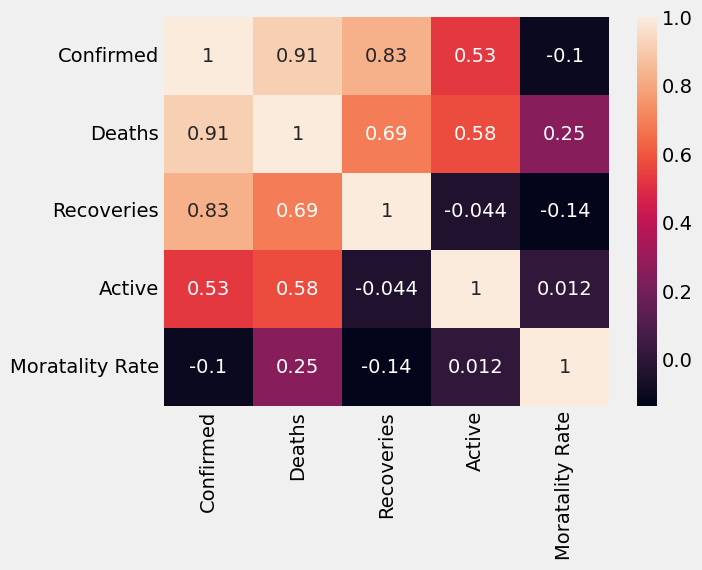

In [35]:
sns.heatmap(continental_df.corr(), annot=True)

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

In [36]:
colors_list = [
    "gold",
    "yellowgreen",
    "lightcoral",
    "lightskyblue",
    "purple",
    "red",
    "blue",
]

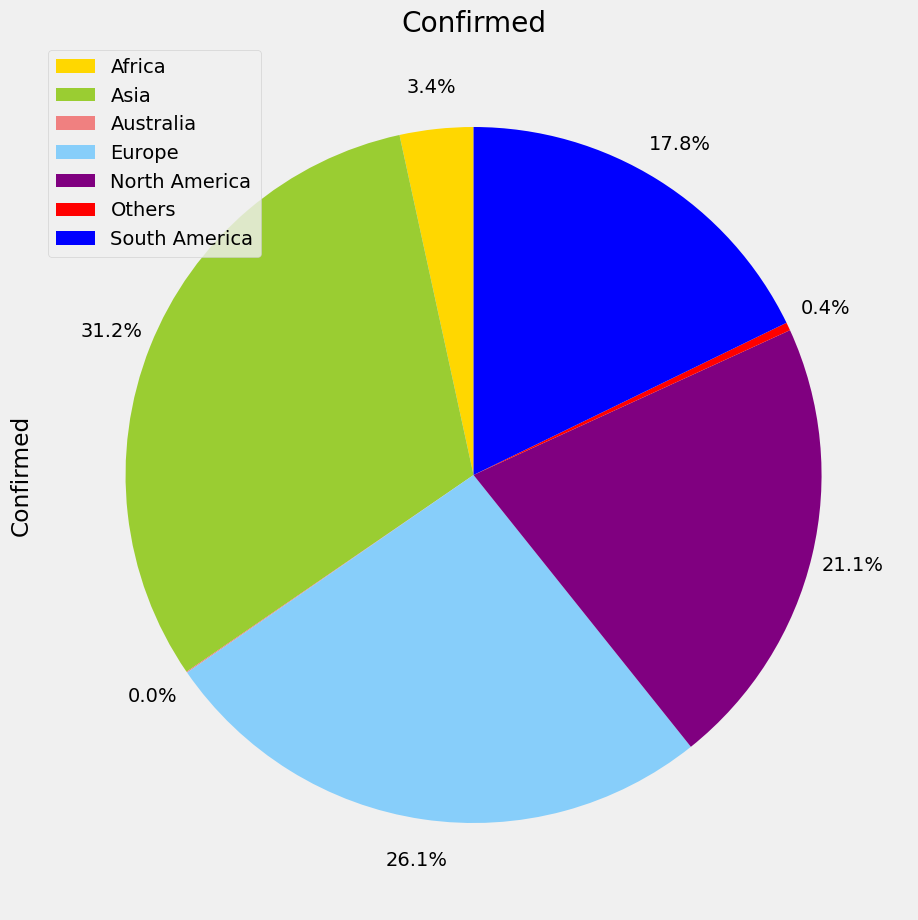

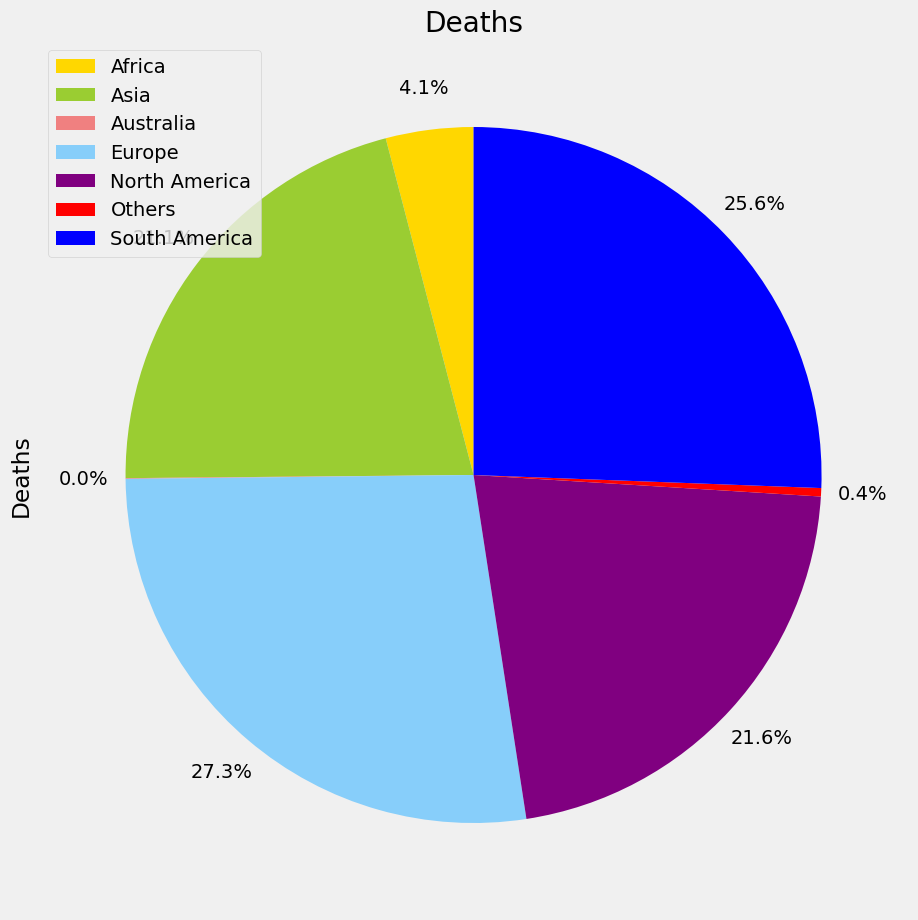

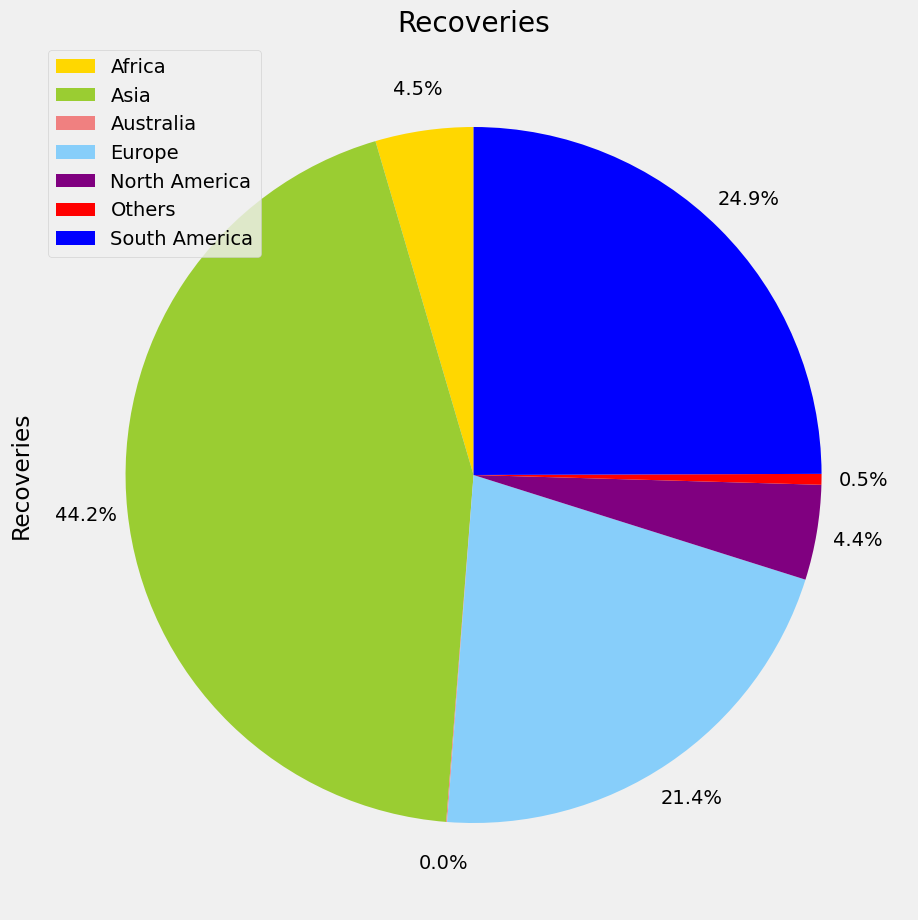

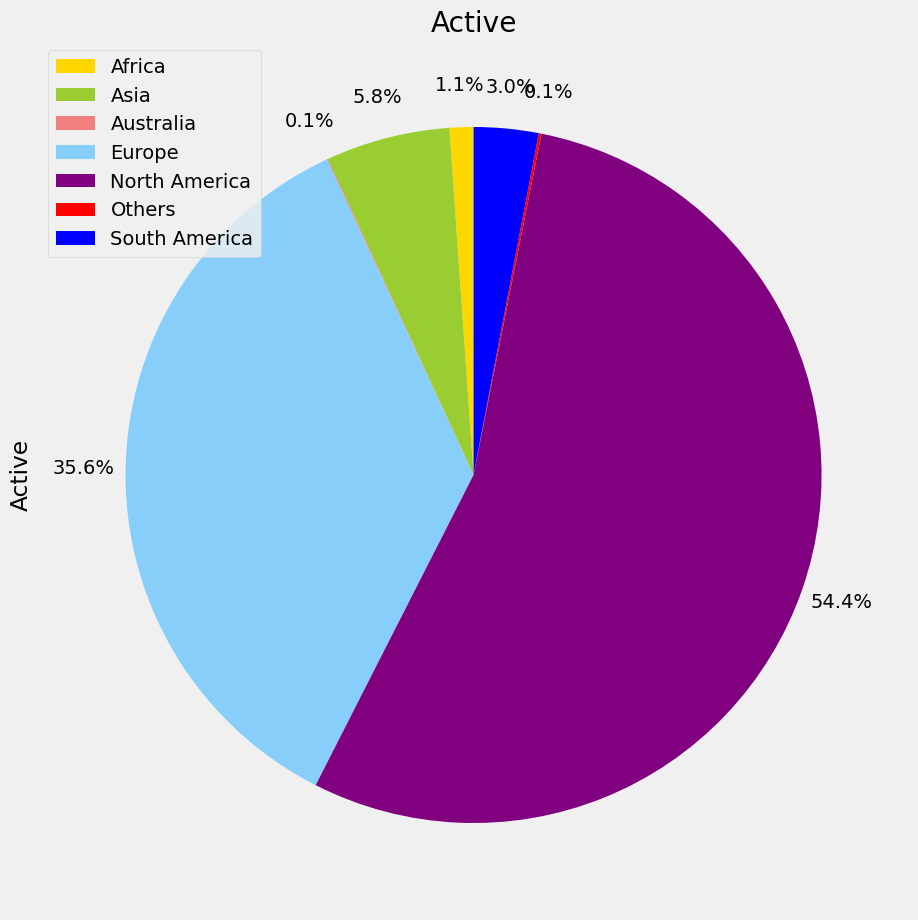

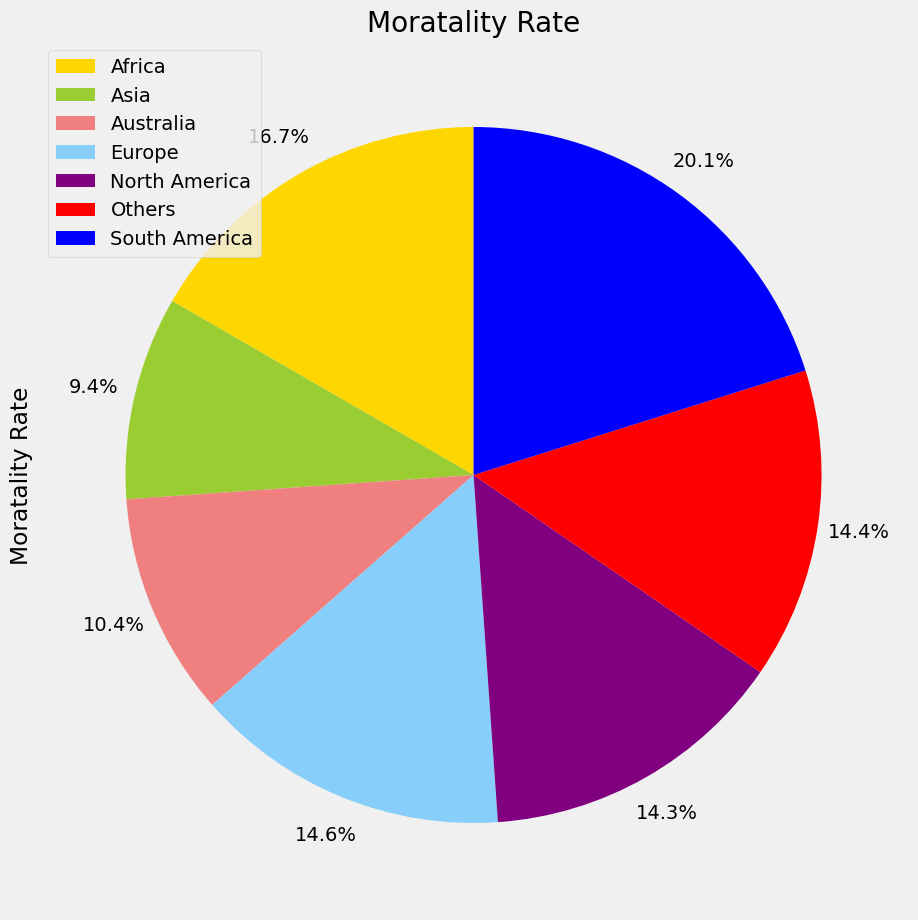

In [37]:
for idx, cont in enumerate(continental_df.columns.values):
    plt.figure(figsize=(10, 20))
    continental_df[cont].plot(
        kind="pie",
        autopct='%1.1f%%',
        startangle=90,
        shadow=False,
        labels=None,
        pctdistance=1.12,
        colors=colors_list,)
    plt.title(cont)
    plt.legend(labels=continental_df.index, loc='upper left')
    plt.show()

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [38]:
country_df.reset_index(inplace=True)
country_df['Long'] = confirmed_df['Long']
country_df['Lat'] = confirmed_df['Lat']
country_df.head()

,Country/Region,Continent,Confirmed,Deaths,Recoveries,Active,Moratality Rate,Long,Lat
0,Afghanistan,Asia,148933,6836,82586,59511,4.59,67.709953,33.93911
1,Albania,Europe,133310,2457,130314,539,1.84,20.168300,41.15330
2,Algeria,Africa,176724,4404,118409,53911,2.49,1.659600,28.03390
3,Andorra,Europe,14797,128,14380,289,0.87,1.521800,42.50630
4,Angola,Africa,43158,1026,39582,2550,2.38,17.873900,-11.20270


In [39]:
country_df['Long'].fillna(country_df['Long'].mean(), inplace=True)
country_df['Lat'].fillna(country_df['Lat'].mean(), inplace=True)

In [59]:
country_df.set_index('Country/Region', inplace=True)

In [60]:
map = folium.Map(location=[10, 0], zoom_start=2)

for i in range(len(country_df)):
  popup = folium.Popup(
  """
  <h3>{}</h3>
  <ul>
    <li>Confirmed: {}</li>
    <li>Deaths: {}</li>
    <li>Recoveries: {}</li>
    <li>Active: {}</li>
    <li>Mortality Rate: {}</li>
  </ul>
  """.format(country_df.index.values[i], 
             country_df['Confirmed'][i], 
             country_df['Deaths'][i], 
             country_df['Recoveries'][i], 
             country_df['Active'][i], 
             country_df['Moratality Rate'][i])
  , parse_html=False, max_width=2650)
  
  folium.Circle(
        radius=int(country_df.iloc[i]["Confirmed"]) / 40,
        location=country_df.iloc[i][["Lat", "Long"]].to_list(),
        fill=True,
        color="orange",
        popup=popup,
    ).add_to(map)

In [61]:
map

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [42]:
cached = country_df.replace(0, np.nan).dropna()
cached = cached.drop(index=cached.loc[cached['Active']<0].index)

log10_df = pd.DataFrame(np.log10(cached['Active']))

In [43]:
for i in ['Lat', 'Long']:
    log10_df[i] = cached[i]


In [44]:
log10_df.replace([np.inf, -np.inf], np.nan, inplace=True)
log10_df.dropna(inplace=True)

In [45]:
log10_df['Country'] = confirmed_df['Country/Region']

In [46]:
fig = px.scatter_geo(
  data_frame=log10_df, 
  lat='Lat', 
  lon='Long', 
  size='Active', 
  color='Active', 
  hover_name='Country', 
  projection='natural earth', 
  title='Log10 Active Cases')

fig.update_coloraxes(colorscale="ylgn")
fig.show()

# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [47]:
top10_confirmed = country_df.sort_values(by='Confirmed', ascending=False).head(10).reset_index()

In [48]:
top10_confirmed.loc[top10_confirmed['Country/Region'] == 'France', 'Continent'] = 'Europe'
top10_confirmed.loc[top10_confirmed['Country/Region'] == 'United Kingdom', 'Continent'] = 'Europe'

In [49]:
top10_confirmed.set_index('Country/Region', inplace=True)
top10_confirmed

,index,Continent,Confirmed,Deaths,Recoveries,Active,Moratality Rate,Long,Lat
Country/Region,,,,,,,,,
USA,186,North America,35460776,611222,0,34849554,1.72,150.550800,7.425600
India,79,Asia,31812114,426290,30974748,411076,1.34,113.550000,22.166700
Brazil,24,South America,20034407,559944,17771228,1703235,2.79,4.469936,50.833300
Russia,146,Europe,6274006,159032,5609682,505292,2.53,19.503300,47.162500
France,62,Europe,6272466,112245,415111,5745110,1.79,117.987400,26.078900
United Kingdom,190,Europe,5980830,157209,24693,5798928,2.63,19.374390,42.708678
Turkey,184,Asia,5822487,51767,5478185,292535,0.89,57.552152,-20.348404
Argentina,7,South America,4975616,106747,4615834,253035,2.15,-63.616700,-38.416100
Colombia,38,South America,4815063,121695,4615354,78014,2.53,104.916700,11.550000


# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

<Figure size 1500x1000 with 0 Axes>

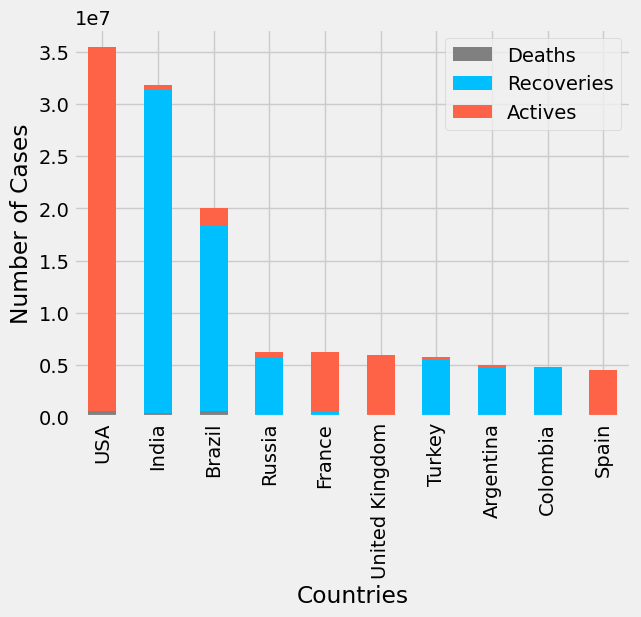

In [50]:
plt.figure(figsize=(15, 10))
top10_confirmed[['Deaths', 'Recoveries', 'Active']].plot(kind='bar', 
                                                         stacked=True, 
                                                         color=['gray', 'deepskyblue', 'tomato'],
                                                         xlabel='Countries',
                                                         ylabel='Number of Cases')
plt.legend(labels=['Deaths', 'Recoveries', 'Actives'], loc='best')
plt.show()

# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

Dịch bệnh phát triển mạnh ở các nước châu âu, đặc biệt ở USA tỷ lệ người mắc bệnh đang chạm đỉnh cao nhất trên toàn thế giới. Ở Anh và Pháp chưa có giải pháp chữa trị nên số người mắc bệnh vẫn đang cao. Các nước khác đang làm tốt công tác kiểm soát và chữa bệnh.

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


In [51]:
deaths_rate = continental_df['Deaths'] / continental_df['Confirmed'] * 100
deaths_rate.sort_values(ascending=False, inplace=True)
deaths_rate

Continent
South America    3.069148
Africa           2.538070
Europe           2.225305
Others           2.204741
North America    2.182940
Australia        1.583333
Asia             1.443875
dtype: float64

`19.1:` South America

In [52]:
continental_df

,Confirmed,Deaths,Recoveries,Active,Moratality Rate
Continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902952,57853343,3780431,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167140,27947075,23334330,2.23
North America,42351963,924518,5776939,35650506,2.18
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


In [53]:
continental_df.sort_values(by='Confirmed', ascending=False, inplace=True)
continental_df.loc[continental_df['Confirmed'] == continental_df['Confirmed'].max(), 'Confirmed']

Continent
Asia    62536726
Name: Confirmed, dtype: int64

`19.2:` Asia

In [54]:
continental_df.loc[continental_df['Recoveries'] == continental_df['Recoveries'].max(), 'Recoveries']

Continent
Asia    57853343
Name: Recoveries, dtype: int64

`19.3:` Asia

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

`20.1:` Vanuatu có tỷ lệ người chết cao nhất 25%</br>
`20.2:` USA có tỷ lệ lan truyền cao nhất: 35460776 ca</br>
`20.3:` India có tỷ lệ khỏi bệnh cao nhất: 30974748 ca</br>

In [68]:
deaths_rate = country_df['Deaths'] / country_df['Confirmed'] * 100
deaths_rate.sort_values(ascending=False, inplace=True)
deaths_rate.head()

Country/Region
Vanuatu       25.000000
MS Zaandam    22.222222
Yemen         19.447576
Peru           9.281108
Mexico         8.360536
dtype: float64

In [71]:
country_df.sort_values(by='Confirmed', ascending=False, inplace=True)
country_df['Confirmed'].head()

Country/Region
USA       35460776
India     31812114
Brazil    20034407
Russia     6274006
France     6272466
Name: Confirmed, dtype: int64

In [74]:
country_df.sort_values(by='Recoveries', ascending=False, inplace=True)
country_df['Recoveries'].head()

Country/Region
India        30974748
Brazil       17771228
Russia        5609682
Turkey        5478185
Argentina     4615834
Name: Recoveries, dtype: int64

# Bài toán 21
**Tập dữ liệu USA**

In [75]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [80]:
# us_medical_data.set_index('Province_State', inplace=True)
us_medical_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].head()

,Confirmed,Deaths,Recovered,Active
Province_State,,,,
Alabama,44932,1007,22082.0,21843.0
Alaska,1184,16,548.0,620.0
American Samoa,0,0,NaN,NaN
Arizona,101455,1829,11836.0,87790.0
Arkansas,24253,292,17834.0,6127.0


Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

`21.1:` Connecticut có tỷ lệ người chết cao nhất 9.23%</br>
`21.2:` New York có tỷ lệ lan truyền cao nhất: 397649 ca</br>
`21.3:` Texas có tỷ lệ khỏi bệnh cao nhất: 103782.0 ca</br>

In [81]:
deaths_rate = us_medical_data['Deaths'] / us_medical_data['Confirmed'] * 100
deaths_rate.sort_values(ascending=False, inplace=True)
deaths_rate.head()

Province_State
Connecticut      9.234503
New Jersey       8.713937
Michigan         8.490862
New York         8.061632
Massachusetts    7.443457
dtype: float64

In [82]:
us_medical_data.sort_values(by='Confirmed', ascending=False, inplace=True)
us_medical_data['Confirmed'].head()

Province_State
New York      397649
California    284348
Florida       206447
Texas         204710
New Jersey    174766
Name: Confirmed, dtype: int64

In [84]:
us_medical_data.sort_values(by='Recovered', ascending=False, inplace=True)
us_medical_data['Recovered'].head()

Province_State
Texas             103782.0
Massachusetts      93157.0
New York           71040.0
Pennsylvania       70437.0
North Carolina     55318.0
Name: Recovered, dtype: float64

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [88]:
us_medical_data.reset_index(inplace=True)
us_medical_data_for_linear = us_medical_data.dropna(
    subset=["People_Tested", "Confirmed"]
)

testing_state = set(["New York", "Florida", "Texas", "California"])
training_state = (
    set(us_medical_data_for_linear["Province_State"].values) - testing_state
)

us_medical_data_for_linear = us_medical_data_for_linear.set_index(
    "Province_State"
)
us_medical_data_for_linear.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
Province_State,,,,,,,,,,,,,,,,,,,,
Texas,US,2020-07-07 04:34:13,31.0545,-97.5635,204710,2891,103782.0,97880.0,48,705.389845,NaN,NaN,NaN,84000048.0,USA,7462.194372,NaN,2020-07-06,2163729.0,1.404168
Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,1597.924586,1168234.0,11469.0,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457
New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32057,71040.0,294552.0,36,2044.093624,4288131.0,89995.0,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632
Pennsylvania,US,2020-07-07 04:34:13,40.5908,-77.2098,94439,6762,70437.0,17240.0,42,737.690057,NaN,NaN,NaN,84000042.0,USA,6509.332261,NaN,2020-07-06,1018320.0,7.160177
North Carolina,US,2020-07-07 04:34:13,35.6301,-79.8064,74775,1432,55318.0,18025.0,37,712.951956,NaN,NaN,NaN,84000037.0,USA,NaN,NaN,2020-07-06,1051846.0,1.915079


In [91]:
X_train = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(training_state)]
).reshape(-1, 1)
y_train = np.array(
    us_medical_data_for_linear["Deaths"].loc[list(training_state)]
).reshape(-1, 1)

X_test = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(testing_state)]
).reshape(-1, 1)
y_test = np.array(
    us_medical_data_for_linear["Deaths"].loc[list(testing_state)]
).reshape(-1, 1)

In [100]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [101]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [102]:
model = LinearRegression()
model.fit(X_train_scaler, y_train)

LinearRegression()

Coefficient: [[2373.16134265]]
Intercept: [1634.88461538]


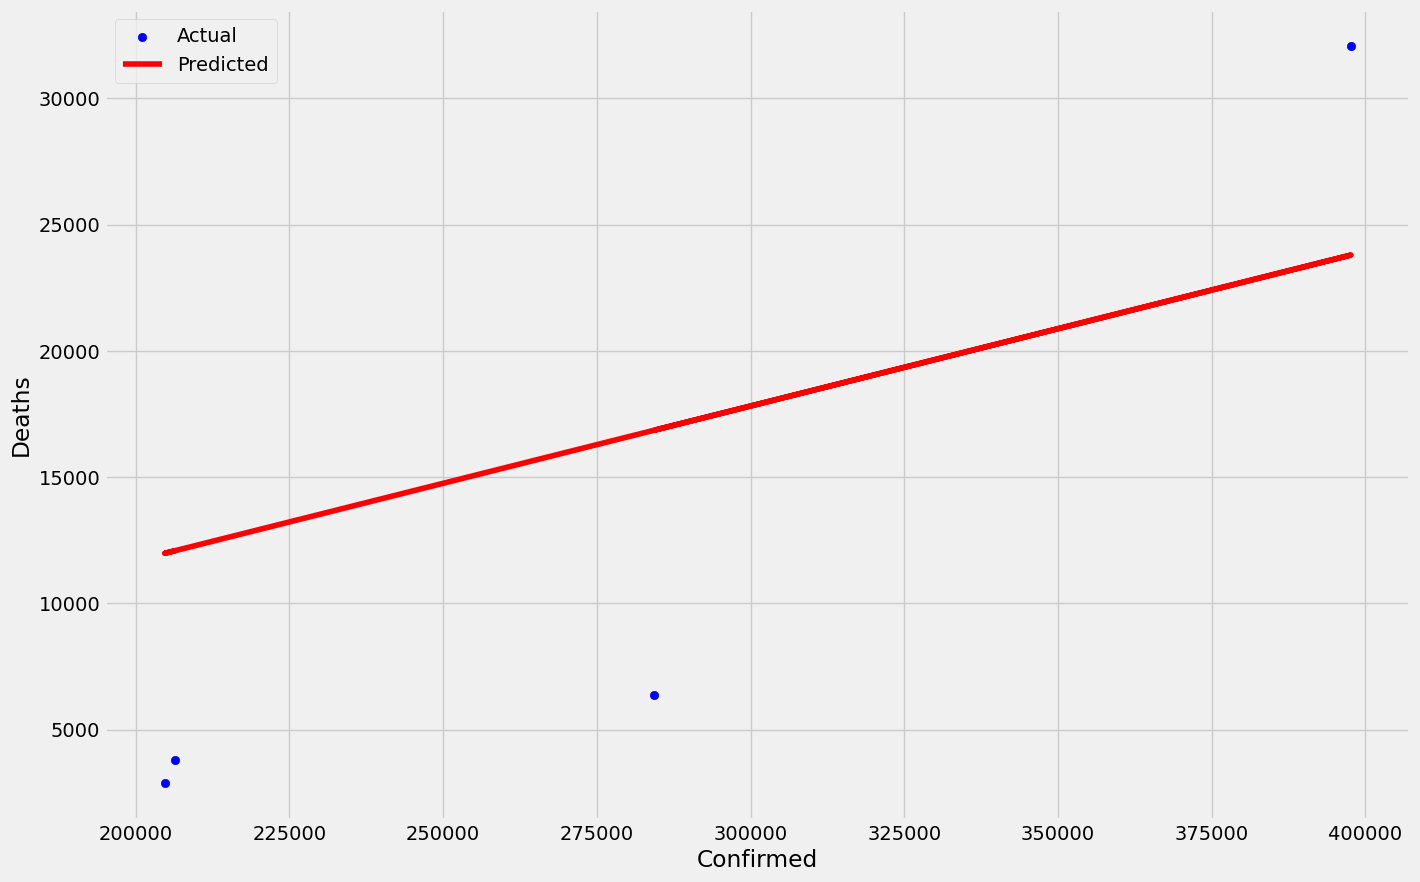

In [103]:
y_pred = model.predict(X_test_scaler)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


plt.figure(figsize=(15, 10))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.legend()
plt.show()

Trong trường hợp sử dụng People Tested để dự báo Confirm với 10 bang có số trường hợp được xác nhận cao nhất

In [104]:
testing_state = set(
    us_medical_data.sort_values(by="Confirmed", ascending=False)[
        "Province_State"
    ]
    .head(10)
    .to_list()
)
training_state = (
    set(
        us_medical_data.dropna(subset=["People_Tested", "Confirmed"])[
            "Province_State"
        ]
    )
    - testing_state
)

In [105]:
X_train = np.array(
    us_medical_data_for_linear["People_Tested"].loc[list(training_state)]
).reshape(-1, 1)
y_train = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(training_state)]
).reshape(-1, 1)

# Testing set
X_test = np.array(
    us_medical_data_for_linear["People_Tested"].loc[list(testing_state)]
).reshape(-1, 1)
y_test = np.array(
    us_medical_data_for_linear["Confirmed"].loc[list(testing_state)]
).reshape(-1, 1)


In [106]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [107]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [108]:
model = LinearRegression()
model.fit(X_train_scaler, y_train)

LinearRegression()

In [109]:
y_pred = model.predict(X_test_scaler)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [[20914.97499177]]
Intercept: [24694.23913043]


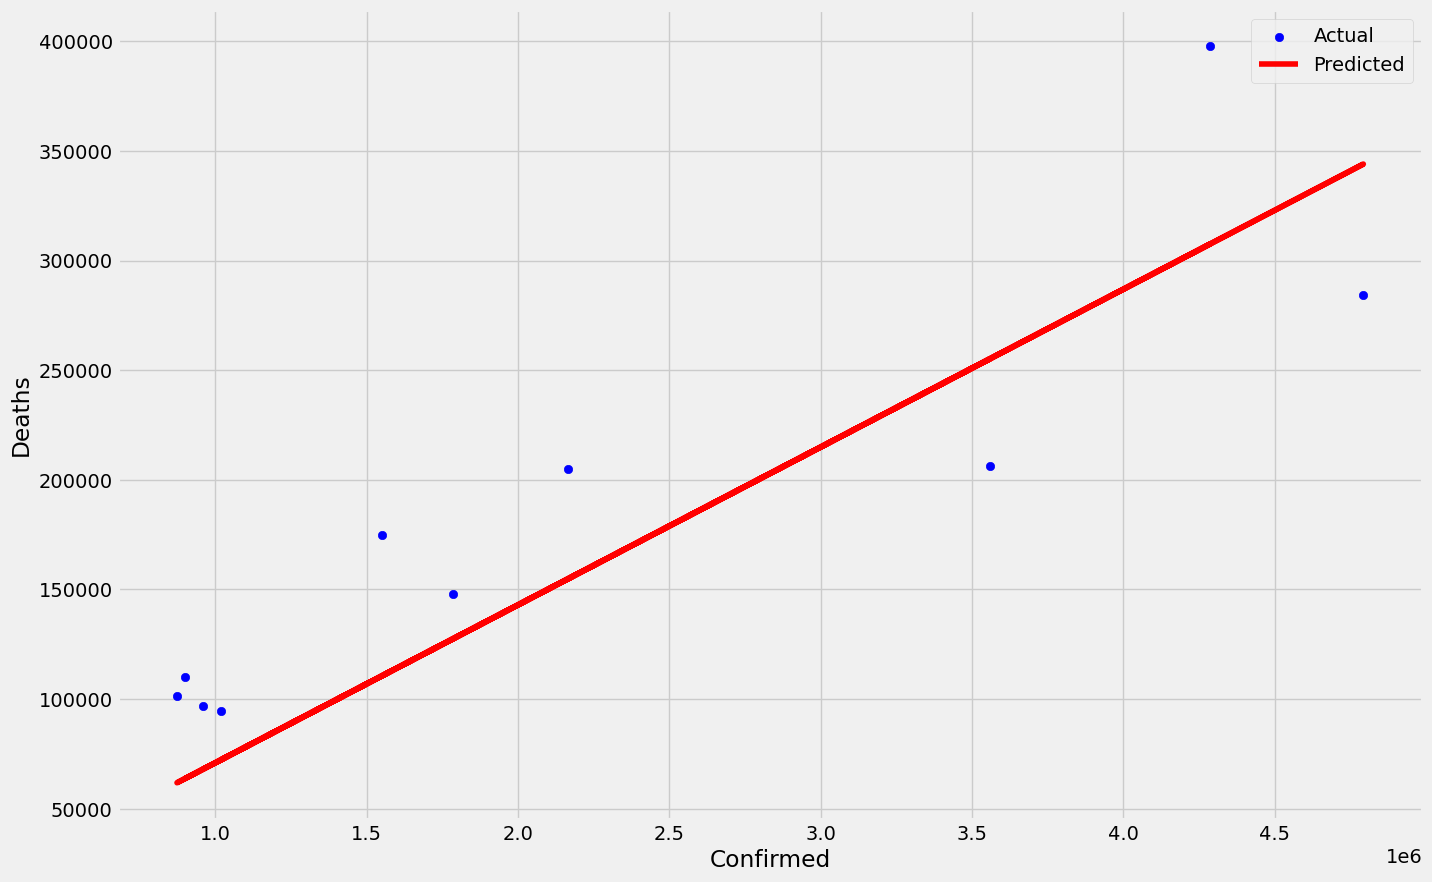

In [111]:
plt.figure(figsize=(15, 10))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.legend()
plt.show()